# Import package

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import re
import warnings


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Check Data (all_reads)

Raw data

In [185]:
# Data RAW
raw = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline21_PopulationEcology/QC/Raw_multiqc_data/1_raw_multiqc_general_stats.txt", sep='\t')
# Need data
raw = raw[['Sample','FastQC_total_sequences']]
# rename
raw = raw.rename(columns={'FastQC_total_sequences':'raw'})
# replace "flagstat"
raw = raw.replace('(.*)\.(.*)', r'\1', regex=True)
# drop duplicate
raw = raw.drop_duplicates(keep='first')
# read count ×2
raw['raw'] = raw['raw'] * 2

Trim data

In [186]:
# Data RAW
trim = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline21_PopulationEcology/QC/Trim_multiqc_data/2_trim_multiqc_general_stats.txt", sep='\t')
# Need data
trim = trim[['Sample','FastQC_total_sequences']]
# rename
trim = trim.rename(columns={'FastQC_total_sequences':'trim'})
# replace "flagstat"
trim = trim.replace('(.*)\.(.*)', r'\1', regex=True)
# drop duplicate
trim = trim.drop_duplicates(keep='first')
# read count ×2
trim['trim'] = trim['trim'] * 2

non_Mito data

In [187]:
# Data RAW
mito = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline21_PopulationEcology/QC/Mito_multiqc_data/3_mito_multiqc_general_stats.txt", sep='\t')
# Need data
mito = mito[['Sample','FastQC_total_sequences']]
# rename
mito = mito.rename(columns={'FastQC_total_sequences':'non_mito'})
# replace "flagstat"
mito = mito.replace('(.*)\.(.*)', r'\1', regex=True)
# drop duplicate
mito = mito.drop_duplicates(keep='first')
# read count ×2
mito['non_mito'] = mito['non_mito'] * 2

Map data

In [188]:
# Data RAW
mapp = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_bwa/multiqc_samtools_flagstat.txt", sep='\t')
# Need data
mapp = mapp[['Sample','properly paired_passed']]
# rename
mapp = mapp.rename(columns={'properly paired_passed':'mapp'})
# replace "_XXX"
mapp = mapp.replace('(.*)_pre', r'\1', regex=True)

View

In [189]:
# Data RAW
view = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_samtools/multiqc_samtools_flagstat.txt", sep='\t')
# Need data
view = view[['Sample','properly paired_passed']]
# rename
view = view.rename(columns={'properly paired_passed':'view'})
# replace "_XXX"
view = view.replace('(.*)_view', r'\1', regex=True)

Sort

In [190]:
# Data RAW
sort = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_samtools/multiqc_samtools_flagstat.txt", sep='\t')
# Need data
sort = sort[['Sample','properly paired_passed']]
# rename
sort = sort.rename(columns={'properly paired_passed':'sort'})
# replace "_XXX"
sort = sort.replace('(.*)_sort', r'\1', regex=True)

Calc. coverage

In [191]:
# Coverageの計算
g_size = 2.63
seq_size = raw["raw"]*150/1000000000

cov = round((seq_size/g_size).mean(),2)

# 最大のリード数・データ量
data_max = max(raw["raw"])/ (10 ** 6)
data_g_max = max(raw["raw"])*150/(10 ** 9)

In [192]:
cov

0.56

Marge data

In [193]:
# 2022
# Merge
df = pd.merge(raw, trim, how="inner", on = "Sample")
df = pd.merge(df, mito, how="left", on = "Sample")
df = pd.merge(df, mapp, how="left", on = "Sample")
df = pd.merge(df, view, how="left", on = "Sample")
df = pd.merge(df, sort, how="left", on = "Sample")

# List
lists = df['Sample']

# Index
df = df.set_index('Sample')

# Mega reads
df_r = df / (10 ** 6)

#Transpose
df_r = df_r.T

# New Col
df_r['process'] = ["raw","trimmed","non-mitoDNA","mapped","filtered mapq","sorted"]

# G base
df_g = df*150/(10 ** 9)

#Transpose
df_g = df_g.T

# New Col
df_g['process']  = ["raw","trimmed","non-mitoDNA","mapped","filterd mapq","sorted"]

In [194]:
df_r

Sample,E3_109,E3_1353,E3_1354,E3_1361,E3_1365,E3_1368,E3_1380,E3_1393,E3_1653,E3_1658,E3_1670,E3_1672,E3_1685,E3_1686,E3_1690,E3_1691,E3_1787,E3_1792,E3_1802,E3_1806,E3_1807,E3_2001,E3_3290,E3_3330,E3_3351,E3_3352,E3_3353,E3_3354,E3_3359,E3_3362,E3_3367,E3_3371,E3_3377,E3_3379,E3_3383,E3_3384,E3_3387,E3_3391,E3_3392,E3_3397,E3_3399,E3_3951,E3_3952,E3_3953,E3_3954,E3_3955,E3_3957,E3_3958,E3_3959,E3_3960,E3_3962,E3_3963,E3_3966,E3_3968,E3_3970,E3_3971,E3_3974,E3_3975,E3_3976,E3_3978,E3_3979,E3_3980,E3_3981,E3_3984,E3_3986,E3_3988,E3_3989,E3_3991,E3_3992,E3_3994,E3_3995,E3_3996,E3_3997,E3_3998,E3_3999,E3_4000,E3_406,E3_417,E3_444,E3_563,E3_572,E3_586,E3_588,E3_597,E3_600,E3_617,E3_635,E3_636,process
raw,9.172886,8.221304,10.893752,9.733142,9.083292,9.742916,9.530636,9.777952,9.917178,9.256516,10.048888,8.833542,9.109520,10.549046,10.399948,9.443934,10.169418,9.194704,9.666218,9.115848,8.531580,9.077464,9.682716,9.357696,10.259218,10.401250,9.428122,9.643796,10.562706,11.172634,10.533524,9.997298,10.002442,10.634926,11.498894,8.225354,10.937370,10.340954,9.735106,9.845404,9.464430,9.937940,11.127370,9.621210,9.093892,11.049452,10.347506,10.376608,10.331566,10.344424,11.190478,9.712670,8.464804,11.231608,10.027540,10.690224,10.888902,10.662332,9.720032,10.511078,8.534430,9.878694,10.433812,10.254828,9.487464,9.775222,10.361412,10.227836,8.838530,10.331932,11.649242,9.519422,9.787882,10.340170,9.107846,10.254050,9.019618,11.099036,9.093328,9.262536,9.014484,10.615240,8.466878,9.706814,8.883854,9.915886,9.240204,10.132088,raw
trim,8.148098,7.328454,9.708834,8.697986,8.107610,8.676358,8.549202,8.684728,8.857504,8.258168,8.995966,7.866800,8.196040,9.425228,9.250386,8.437612,9.039122,8.222902,8.626594,8.161402,7.605140,8.121948,8.588834,8.366572,9.164244,9.322516,8.398298,8.597668,9.400144,10.008856,9.385330,8.971372,8.996732,9.590498,10.178822,7.346906,9.810920,9.231548,8.691876,8.726392,8.484346,8.839482,9.951194,8.605622,8.084830,9.874690,9.250800,9.278614,9.200210,9.217802,10.009622,8.687998,7.539688,10.014470,8.973208,9.583502,9.758836,9.649778,8.750972,9.412354,7.531594,8.822322,9.321706,9.172816,8.564146,8.752868,9.283570,9.165200,7.915966,9.257676,10.397008,8.502610,8.720068,9.251210,8.123330,9.168016,8.025872,10.044214,8.131342,8.266194,8.049060,9.418542,7.610082,8.628852,7.938314,8.807160,8.268696,9.036914,trimmed
non_mito,8.148020,7.328290,9.708544,8.697766,8.107454,8.675972,8.549000,8.684244,8.857204,8.257800,8.995716,7.866376,8.195954,9.425006,9.250126,8.437258,9.038756,8.222624,8.626416,8.161140,7.604970,8.121688,8.588502,8.366096,9.164172,9.322302,8.398260,8.597508,9.399854,10.008564,9.385120,8.971172,8.996630,9.589560,10.178466,7.346694,9.810602,9.231510,8.691736,8.726164,8.484130,8.839384,9.950864,8.605512,8.084576,9.874622,9.250606,9.278472,9.200070,9.217536,10.009436,8.687718,7.539520,10.014254,8.972910,9.583248,9.758532,9.649634,8.750782,9.412130,7.531150,8.822072,9.321532,9.172596,8.563964,8.752600,9.283292,9.164998,7.915874,9.257436,10.396822,8.502520,8.719948,9.250986,8.123176,9.167900,8.025516,10.044214,8.131148,8.265952,8.048810,9.418234,7.609844,8.628558,7.938050,8.806916,8.268414,9.036678,non-mitoDNA
mapp,7.443362,6.727902,8.933196,7.993374,7.464094,8.000166,7.843152,7.991184,8.158494,7.643526,8.245228,7.284384,7.590362,8.666346,8.504730,7.763166,8.372376,7.546306,7.912220,7.470860,6.996748,7.455152,7.841838,6.294468,8.461162,8.608844,7.763748,7.891104,8.730938,9.278316,8.659392,8.264080,8.299732,3.475414,9.433366,6.774438,9.071080,8.492900,7.978012,8.073222,7.797476,8.169762,9.227200,7.937636,7.443100,9.170246,8.559182,8.536188,8.518598,8.518668,9.205424,8.032074,6.900652,9.228986,8.277094,8.843850,8.962104,8.836606,8.015108,8.682540,6.952532,8.125238,8.552442,8.478308,7.848504,8.057578,8.566740,8.440108,7.338354,8.534502,9.617092,7.877784,8.079400,8.505688,7.458552,8.473968,7.368776,2.680452,7.523356,7.558180,7.439460,8.679254,6.975318,7.935682,7.254882,8.097660,7.583080,8.304416,mapped
view,5.191234,4.65484

mean number of reads

In [244]:
# Calc. mean no of reads
tmp = df_r.drop('process', axis=1)
tmp = tmp.T

# to list
tmp = tmp["raw"].values.tolist()

# mean
ave = round(sum(tmp) / len(tmp),2)

In [243]:
ave

9.88

## Plot (Total reads)

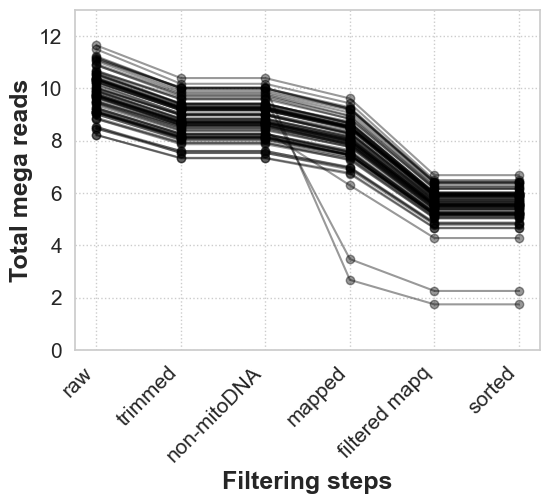

In [145]:
# Plot
sns.set(style="whitegrid", font='Arial')
fig, ax = plt.subplots(figsize=(6,5))

i = 0
for lis in lists:
    ax.plot(df_r['process'],df_r[lis],color="black",marker = "o", label=lis, alpha=0.4)
    i = i + 1
    
plt.ylabel('Total mega reads', fontsize=18, fontweight='bold')
plt.xlabel('Filtering steps', fontsize=18, fontweight='bold')    
plt.xticks(fontsize=15)
plt.yticks(list(range(0,round(data_max)+1,2)),fontsize=15)
plt.ylim([0,round(data_max)+1])
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')
fig.autofmt_xdate(rotation=45)
plt.savefig("Omi_GRASDi_seqreads.png",dpi=120, bbox_inches='tight')

## Plot (Total base (Gb))

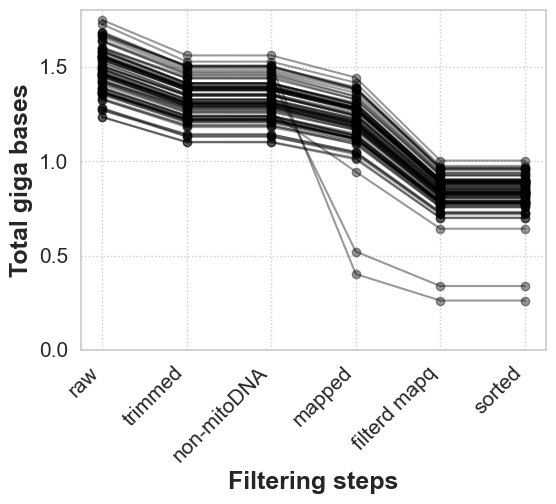

In [146]:
# Plot
sns.set(style="whitegrid", font='Arial')
fig, ax = plt.subplots(figsize=(6,5))

i = 0
for lis in lists:
    ax.plot(df_g['process'],df_g[lis],color="black",marker = "o", label=lis, alpha=0.4)
    i = i + 1
    
plt.ylabel('Total giga bases', fontsize=18, fontweight='bold')
plt.xlabel('Filtering steps', fontsize=18, fontweight='bold')    
plt.xticks(fontsize=15)
plt.yticks(list(np.arange(0,round(data_g_max)+0.1,0.5)),fontsize=15)
plt.ylim([0,round(data_g_max,1)+0.1])
fig.autofmt_xdate(rotation=45)
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')

## Mapping rate

In [273]:
# Data RAW
mapp = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_bwa/multiqc_samtools_flagstat.txt", sep='\t')

# データ量が少ない2個体を除く
mapp = mapp[mapp["properly paired_passed_pct"] >= 50]

tmp = mapp.describe()

# to list
tmp = tmp["properly paired_passed_pct"]

tmp

count    86.000000
mean     91.924419
std       1.858394
min      75.240000
25%      91.820000
50%      92.095000
75%      92.430000
max      92.880000
Name: properly paired_passed_pct, dtype: float64

# Check Data (downsample)

Raw data

In [147]:
# Data RAW
raw = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_raw_down/multiqc_general_stats.txt", sep='\t')
# Need data
raw = raw[['Sample','FastQC_total_sequences']]
# rename
raw = raw.rename(columns={'FastQC_total_sequences':'raw'})
# replace "flagstat"
raw = raw.replace('(.*)\.1_0.5(.*)', r'\1', regex=True)
# drop duplicate
raw = raw.drop_duplicates(keep='first')
# read count ×2
raw['raw'] = raw['raw'] * 2

Trim data

In [148]:
# Data RAW
trim = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_trim_down/multiqc_fastqc.txt", sep='\t')
# Need data
trim = trim[['Sample','Total Sequences']]
# rename
trim = trim.rename(columns={'Total Sequences':'trim'})
# replace "flagstat"
trim = trim.replace('(.*)\.1_0.5(.*)', r'\1', regex=True)
# drop duplicate
trim = trim.drop_duplicates(keep='first')
# read count ×2
trim['trim'] = trim['trim'] * 2

non_Mito data

In [149]:
# Data RAW
mito = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_mito_down/multiqc_general_stats.txt", sep='\t')
# Need data
mito = mito[['Sample','FastQC_total_sequences']]
# rename
mito = mito.rename(columns={'FastQC_total_sequences':'non_mito'})
# replace "flagstat"
mito = mito.replace('(.*)_0.5(.*)', r'\1', regex=True)
# drop duplicate
mito = mito.drop_duplicates(keep='first')
# read count ×2
mito['non_mito'] = mito['non_mito'] * 2

Map data

In [150]:
# Data RAW
mapp = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_bwa_down/multiqc_samtools_flagstat.txt", sep='\t')
# Need data
mapp = mapp[['Sample','properly paired_passed']]
# rename
mapp = mapp.rename(columns={'properly paired_passed':'mapp'})
# replace "_XXX"
mapp = mapp.replace('(.*)_0.5_pre', r'\1', regex=True)

View

In [151]:
# Data RAW
view = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_samtools_down/multiqc_samtools_flagstat.txt", sep='\t')
# Need data
view = view[['Sample','properly paired_passed']]
# rename
view = view.rename(columns={'properly paired_passed':'view'})
# replace "_XXX"
view = view.replace('(.*)_0.5_view', r'\1', regex=True)

Sort

In [152]:
# Data RAW
sort = pd.read_csv("/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/QC/multiqc_data_samtools_down/multiqc_samtools_flagstat.txt", sep='\t')
# Need data
sort = sort[['Sample','properly paired_passed']]
# rename
sort = sort.rename(columns={'properly paired_passed':'sort'})
# replace "_XXX"
sort = sort.replace('(.*)_0.5_sort', r'\1', regex=True)

Calc. coverage

In [153]:
# Coverageの計算
g_size = 2.63
seq_size = raw["raw"]*150/1000000000

cov = round((seq_size/g_size).mean(),2)

# 最大のリード数・データ量
data_max = max(raw["raw"])/ (10 ** 6)
data_g_max = max(raw["raw"])*150/(10 ** 9)

In [154]:
cov

0.2

Marge data

In [155]:
# 2022
# Merge
df = pd.merge(raw, trim, how="inner", on = "Sample")
df = pd.merge(df, mito, how="inner", on = "Sample")
df = pd.merge(df, mapp, how="inner", on = "Sample")
df = pd.merge(df, view, how="inner", on = "Sample")
df = pd.merge(df, sort, how="inner", on = "Sample")

# List
lists = df['Sample']

# Index
df = df.set_index('Sample')

# Mega reads
df_r = df / (10 ** 6)

#Transpose
df_r = df_r.T

# New Col
df_r['process'] = ["raw","trimmed","non-mitoDNA","mapped","filtered mapq","sorted"]

# G base
df_g = df*150/(10 ** 9)

#Transpose
df_g = df_g.T

# New Col
df_g['process']  = ["raw","trimmed","non-mitoDNA","mapped","filterd mapq","sorted"]

In [156]:
df_r

Sample,E3_109,E3_1353,E3_1354,E3_1361,E3_1365,E3_1368,E3_1380,E3_1393,E3_1653,E3_1658,E3_1670,E3_1672,E3_1685,E3_1686,E3_1690,E3_1691,E3_1787,E3_1792,E3_1802,E3_1806,E3_1807,E3_2001,E3_3290,E3_3330,E3_3351,E3_3352,E3_3353,E3_3354,E3_3359,E3_3362,E3_3367,E3_3371,E3_3377,E3_3379,E3_3383,E3_3384,E3_3387,E3_3391,E3_3392,E3_3397,E3_3399,E3_3951,E3_3952,E3_3953,E3_3954,E3_3955,E3_3957,E3_3958,E3_3959,E3_3960,E3_3962,E3_3963,E3_3966,E3_3968,E3_3970,E3_3971,E3_3974,E3_3975,E3_3976,E3_3978,E3_3979,E3_3980,E3_3981,E3_3984,E3_3986,E3_3988,E3_3989,E3_3991,E3_3992,E3_3994,E3_3995,E3_3996,E3_3997,E3_3998,E3_3999,E3_4000,E3_406,E3_417,E3_444,E3_563,E3_572,E3_586,E3_588,E3_597,E3_600,E3_617,E3_635,E3_636,process
raw,4.587410,4.111374,5.448152,4.867944,4.542724,4.872804,4.766116,4.889994,4.959950,4.629206,5.025996,4.417104,4.555804,5.276154,5.201390,4.722778,5.086360,4.598278,4.834290,4.558824,4.266004,4.539700,4.842552,4.679604,5.131094,5.201996,4.714900,4.822902,5.282942,5.587880,5.268434,5.000180,5.002750,5.318944,5.751102,4.113372,5.470062,5.171930,4.868882,4.923868,4.733034,4.970234,5.565392,4.811500,4.547960,5.526612,5.175078,5.189704,5.167132,5.173634,5.596724,4.857568,4.232800,5.617340,5.015206,5.346532,5.445716,5.332530,4.861348,5.257172,4.267336,4.940702,5.218452,5.129028,4.744470,4.888608,5.182032,5.115502,4.419594,5.167348,5.826498,4.760362,4.895012,5.171538,4.554984,5.128646,4.510272,5.551166,4.547644,4.632264,4.507638,5.309054,4.233826,4.854670,4.442356,4.959272,4.620912,5.067732,raw
trim,4.075224,3.664782,4.856190,4.350554,4.054090,4.338988,4.275288,4.342726,4.430732,4.128578,4.500298,3.934160,4.099094,4.713066,4.626600,4.219106,4.519796,4.112560,4.313692,4.082154,3.802566,4.061982,4.296052,4.182962,4.583938,4.662836,4.199860,4.299728,4.700244,5.005610,4.694142,4.487804,4.499758,4.796976,5.091158,3.673986,4.905846,4.616280,4.347838,4.365042,4.242852,4.421978,4.977044,4.303178,4.042998,4.939182,4.627002,4.640762,4.601550,4.610692,5.004946,4.344420,3.770648,5.007714,4.486126,4.791906,4.880778,4.827722,4.377228,4.707552,3.765956,4.413832,4.662182,4.590000,4.283144,4.375880,4.643120,4.584296,3.958510,4.629708,5.199578,4.251080,4.361210,4.628318,4.062552,4.585790,4.012480,5.024096,4.065946,4.134568,4.024752,4.710414,3.805092,4.315334,3.969572,4.404302,4.135422,4.520192,trimmed
non_mito,4.075184,3.664708,4.856050,4.350454,4.054006,4.338800,4.275236,4.342472,4.430596,4.128380,4.500158,3.933946,4.099048,4.712940,4.626472,4.218930,4.519598,4.112460,4.313614,4.082052,3.802474,4.061822,4.295912,4.182740,4.583872,4.662734,4.199848,4.299648,4.700126,5.005482,4.694026,4.487706,4.499710,4.796488,5.090974,3.673870,4.905684,4.616262,4.347746,4.364934,4.242728,4.421936,4.976896,4.303112,4.042910,4.939146,4.626916,4.640696,4.601474,4.610554,5.004854,4.344254,3.770558,5.007562,4.485946,4.791754,4.880642,4.827634,4.377124,4.707416,3.765714,4.413708,4.662080,4.589882,4.283050,4.375788,4.642984,4.584144,3.958420,4.629586,5.199488,4.251048,4.361172,4.628192,4.062474,4.585744,4.012338,5.024096,4.065820,4.134442,4.024644,4.710224,3.804966,4.315146,3.969434,4.404170,4.135264,4.520084,non-mitoDNA
mapp,3.723542,3.364946,4.469190,3.998896,3.732074,4.000348,3.922602,3.995972,4.080766,3.820736,4.124998,3.643710,3.796458,4.334474,4.254254,3.881602,4.186514,3.774510,3.955926,3.735680,3.498642,3.728214,3.921390,3.149530,4.231916,4.306630,3.881708,3.945388,4.365296,4.640880,4.329988,4.133440,4.151712,1.738028,4.716728,3.386904,4.536508,4.247152,3.991174,4.038186,3.898084,4.086868,4.614354,3.969562,3.721962,4.587302,4.281158,4.269188,4.261002,4.261260,4.603584,4.015590,3.451322,4.615448,4.138150,4.422348,4.481346,4.421272,4.009470,4.342182,3.475778,4.064564,4.277252,4.242672,3.925446,4.028362,4.283528,4.222020,3.669130,4.267912,4.808564,3.938616,4.042198,4.255252,3.729690,4.239082,3.683968,1.341256,3.761102,3.781678,3.719712,4.340616,3.487894,3.968886,3.628032,4.048956,3.792620,4.153788,mapped
view,2.595399,2.327264,3.094208,2.766566,2.585352,2.769061,2.725630,2.76

## Plot (Total reads)

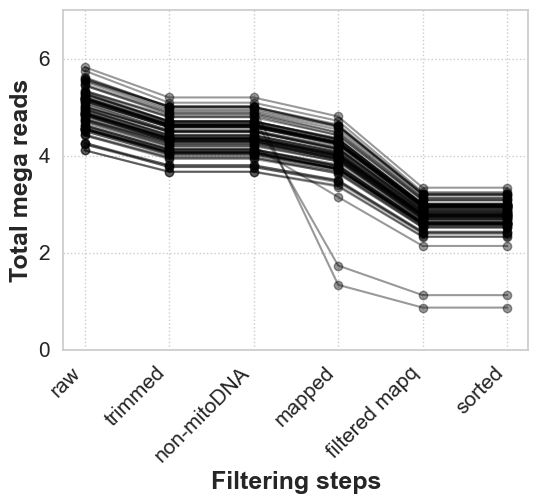

In [157]:
# Plot
sns.set(style="whitegrid", font='Arial')
fig, ax = plt.subplots(figsize=(6,5))

i = 0
for lis in lists:
    ax.plot(df_r['process'],df_r[lis],color="black",marker = "o", label=lis, alpha=0.4)
    i = i + 1
    
plt.ylabel('Total mega reads', fontsize=18, fontweight='bold')
plt.xlabel('Filtering steps', fontsize=18, fontweight='bold')    
plt.xticks(fontsize=15)
plt.yticks(list(range(0,round(data_max)+1,2)),fontsize=15)
plt.ylim([0,round(data_max)+1])
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')
fig.autofmt_xdate(rotation=45)
plt.savefig("Omi_GRASDi_seqreads_down.png",dpi=120, bbox_inches='tight')

## Plot (Total base (Gb))

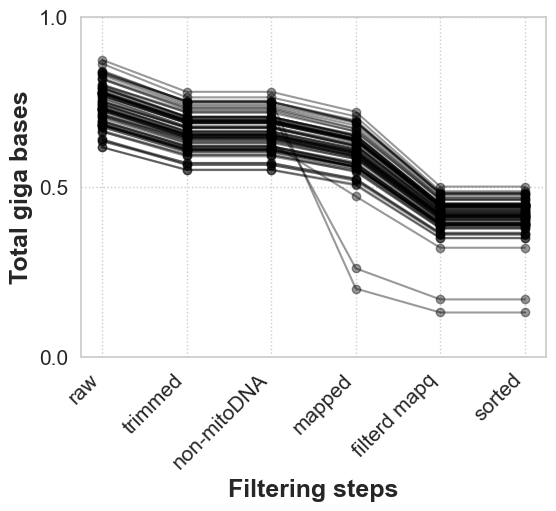

In [158]:
# Plot
sns.set(style="whitegrid", font='Arial')
fig, ax = plt.subplots(figsize=(6,5))

i = 0
for lis in lists:
    ax.plot(df_g['process'],df_g[lis],color="black",marker = "o", label=lis, alpha=0.4)
    i = i + 1
    
plt.ylabel('Total giga bases', fontsize=18, fontweight='bold')
plt.xlabel('Filtering steps', fontsize=18, fontweight='bold')    
plt.xticks(fontsize=15)
plt.yticks(list(np.arange(0,round(data_g_max)+0.1,0.5)),fontsize=15)
plt.ylim([0,round(data_g_max,1)+0.1])
fig.autofmt_xdate(rotation=45)
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')

# Linkage Disequilibrium

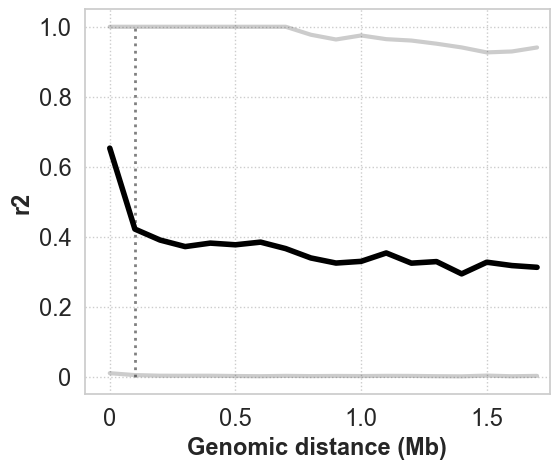

In [128]:

ld = "/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/output/snps_mindp20_maxdp200_imiss50_maf5_cr90_hwe.ld"
png = "LD_stacks_mindp20_maxdp200_filtered.png"

#LD decayの算出
#Data Frame
data = pd.read_csv(ld, sep=' +')
data['BP_A'].astype(int)
data['BP_B'].astype(int)
data['Dis'] = (data['BP_B'] - data['BP_A'])/1000000

#作図
sns.set(style="whitegrid", font='Arial')

#LDdecayの平均値
# Dis < 10000 kb
data1 = data[data.Dis < 1.75]
data2 = data[data.Dis < 1.75]

data2['Dis'] = data2['Dis'].round(1)

df_2 = data2.groupby("Dis").describe(percentiles=[0.05,0.95])
df_R2 = df_2['R2']

sns.set(style="whitegrid", font='Arial')
fig, ax = plt.subplots(figsize=(6,5))

plt.plot([0.1, 0.1],[0, 1], "gray", linestyle="dotted", linewidth=2, alpha=1)

#plt.plot(data1['Dis'],data1['R2'], linewidth=0, color='black', marker="o", markersize=1, alpha=0.01)
plt.plot(df_R2['mean'], color = 'black', alpha=1, linewidth=4, label="Mean")

plt.plot(df_R2['5%'], color = 'black',linestyle = "solid", alpha=0.2, linewidth=3, label="5 percentile")
plt.plot(df_R2['95%'], color = 'black',linestyle = "solid", alpha=0.2, linewidth=3, label="95 percentile")

plt.xlabel('Genomic distance (Mb)', fontsize=17,fontweight='bold')
plt.ylabel("r2", fontsize=17, fontweight='bold')
plt.xticks(list(np.arange(0,2.0,0.5)),["0","0.5","1.0","1.5"],fontsize=17)
plt.yticks(list(np.arange(0,1.2,0.2)),["0","0.2","0.4","0.6","0.8","1.0"],fontsize=17)
plt.xlim([-0.1,1.75])
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')
#plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=17)
plt.savefig(png, dpi=120, bbox_inches='tight')

# Minor allele frequency

## all data set

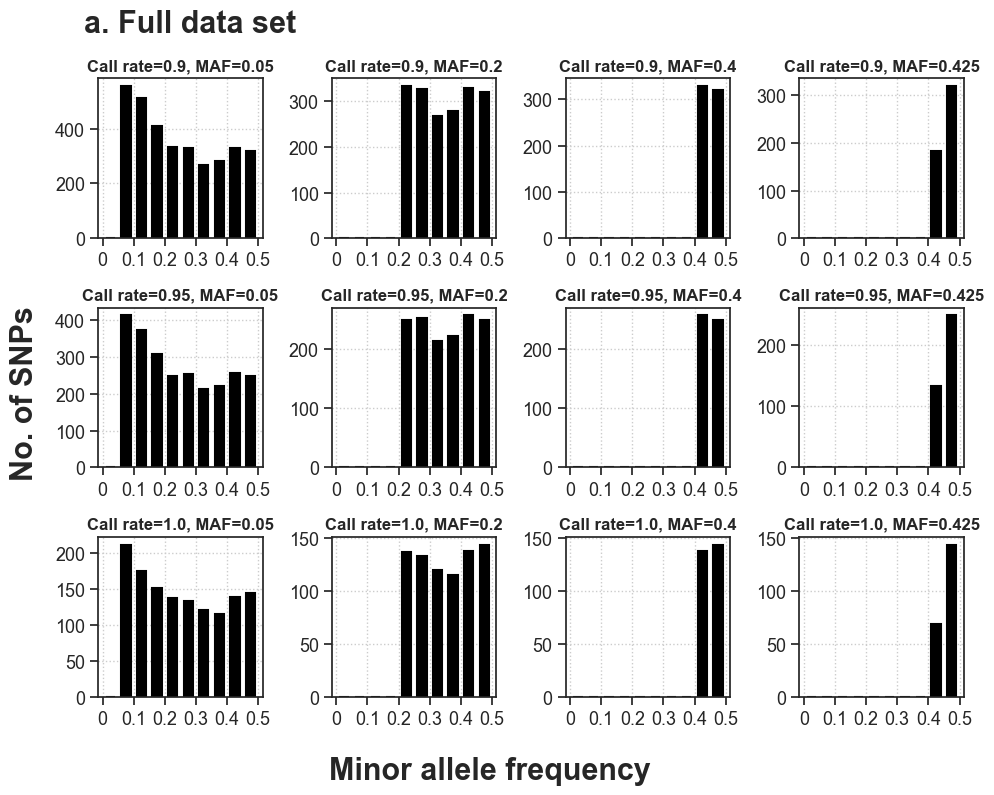

In [113]:

path = "/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/output/"

lists1 = ["snps_mindp20_maxdp200_imiss50_maf5_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf20_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf40_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf425_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf5_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf20_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf40_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf425_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf20_cr100_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf40_cr100_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf425_cr100_hwe_ld"]

cr_maf = ['Call rate=0.9, MAF=0.05',
          'Call rate=0.9, MAF=0.2',
          'Call rate=0.9, MAF=0.4',
          'Call rate=0.9, MAF=0.425',
          'Call rate=0.95, MAF=0.05',
          'Call rate=0.95, MAF=0.2',
          'Call rate=0.95, MAF=0.4',
          'Call rate=0.95, MAF=0.425',
          'Call rate=1.0, MAF=0.05',
          'Call rate=1.0, MAF=0.2',
          'Call rate=1.0, MAF=0.4',
          'Call rate=1.0, MAF=0.425']

No = list(range(1,13,1))

sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(10,8))


i = 0
for lis in lists1:
    frq_name = path + lis + ".frq"
    
    # Allele Frequency
    df = pd.read_csv(frq_name, sep=' +')
    # maf
    maf = df["MAF"].astype(float)
    
    # Number of SNPs
    SNPN = str(int(len(df.index)))
    
    # 階級の数を整数で指定する
    bins = np.linspace(0, 0.5, 11)
    maf2 = pd.cut(maf, bins,right=False)
    freq = pd.value_counts(maf2, sort=False)
    # 階級値、相対度数、累積度数、相対累積度数
    class_value = (bins[:-1] + bins[1:]) / 2  # 階級値
    rel_freq = freq / maf2.count()  # 相対度数
    cum_freq = freq.cumsum()  # 累積度数
    rel_cum_freq = rel_freq.cumsum()  # 相対累積度数
    # 度数分布表を作成
    dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
    )
    
    # Plot
    
    # new col.
    dist["rank"] = dist.index
    dist["order"] = list(range(1,11,1))
    dist["maf"] = np.arange(0.05,0.55,0.05).round(2)
    # Rename col
    dist = dist.rename(columns={"度数":"SNPs"})
    
    # Dist. Plot
    
    title = cr_maf[i] 
    
    ax = fig.add_subplot(3, 4, No[i])
    ax = plt.bar(dist["階級値"], dist["SNPs"], width=0.03, ec="black", lw=1.5, color="black")
    plt.title(title, fontweight="bold", fontsize=12)
    plt.xlabel("", fontsize=18)
    plt.ylabel("", fontsize=18)
    plt.xticks(np.arange(0,0.55,0.1),["0","0.1","0.2","0.3","0.4","0.5"],fontsize=13)
    plt.yticks(fontsize=13)

    fig.suptitle("a. Full data set", fontweight="bold", fontsize=22, x=0.2)
    fig.supxlabel('Minor allele frequency', fontsize=22, fontweight="bold")
    fig.supylabel('No. of SNPs', fontsize=22, fontweight="bold")
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')
    fig.tight_layout()
    
    
    i = i + 1
    
plt.savefig("MAFdist_all.png",dpi=120, bbox_inches='tight')

In [114]:
dist

,階級値,SNPs,相対度数,累積度数,相対累積度数,rank,order,maf
"[0.0, 0.05)",0.025,0,0.000000,0,0.000000,"[0.0, 0.05)",1,0.05
"[0.05, 0.1)",0.075,0,0.000000,0,0.000000,"[0.05, 0.1)",2,0.10
"[0.1, 0.15)",0.125,0,0.000000,0,0.000000,"[0.1, 0.15)",3,0.15
"[0.15, 0.2)",0.175,0,0.000000,0,0.000000,"[0.15, 0.2)",4,0.20
"[0.2, 0.25)",0.225,0,0.000000,0,0.000000,"[0.2, 0.25)",5,0.25
"[0.25, 0.3)",0.275,0,0.000000,0,0.000000,"[0.25, 0.3)",6,0.30
"[0.3, 0.35)",0.325,0,0.000000,0,0.000000,"[0.3, 0.35)",7,0.35
"[0.35, 0.4)",0.375,0,0.000000,0,0.000000,"[0.35, 0.4)",8,0.40
"[0.4, 0.45)",0.425,69,0.323944,69,0.323944,"[0.4, 0.45)",9,0.45
"[0.45, 0.5)",0.475,144,0.676056,213,1.000000,"[0.45, 0.5)",10,0.50


## reduced data set

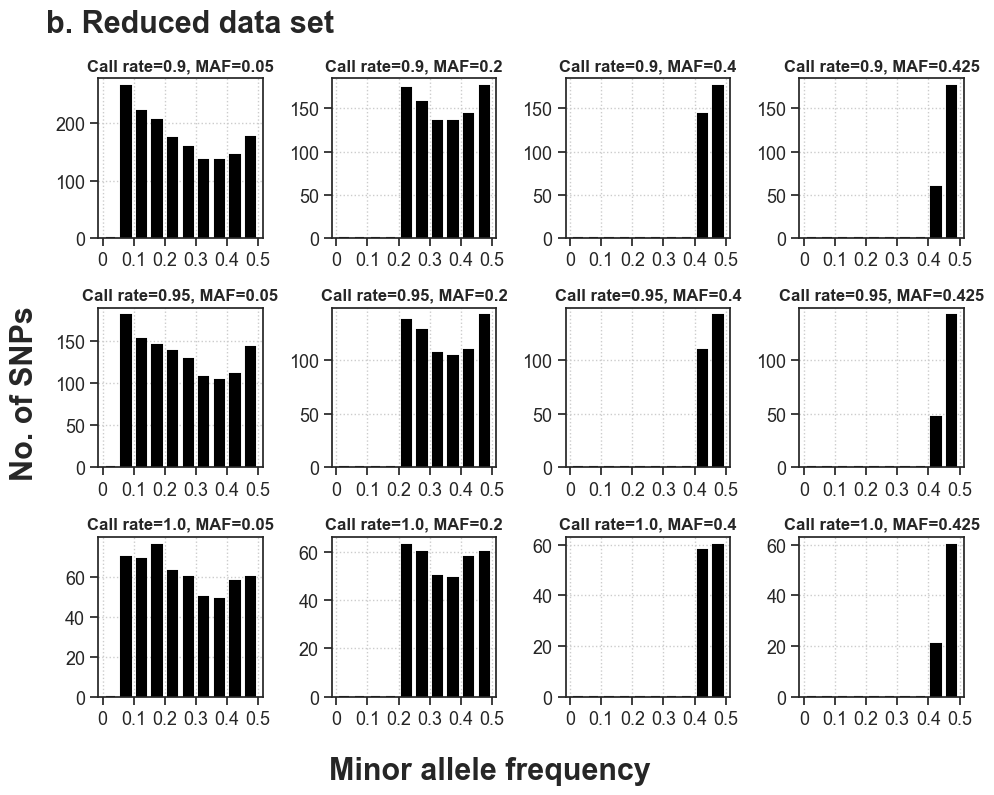

In [115]:

path = "/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/output/"

lists2 = ["snps_down_mindp20_maxdp200_imiss50_maf5_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf20_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf40_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf425_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf5_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf20_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf40_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf425_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf20_cr100_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf40_cr100_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf425_cr100_hwe_ld"]

cr_maf = ['Call rate=0.9, MAF=0.05',
          'Call rate=0.9, MAF=0.2',
          'Call rate=0.9, MAF=0.4',
          'Call rate=0.9, MAF=0.425',
          'Call rate=0.95, MAF=0.05',
          'Call rate=0.95, MAF=0.2',
          'Call rate=0.95, MAF=0.4',
          'Call rate=0.95, MAF=0.425',
          'Call rate=1.0, MAF=0.05',
          'Call rate=1.0, MAF=0.2',
          'Call rate=1.0, MAF=0.4',
          'Call rate=1.0, MAF=0.425']

No = list(range(1,13,1))

sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(10,8))


i = 0
for lis in lists2:
    frq_name = path + lis + ".frq"
    
    # Allele Frequency
    df = pd.read_csv(frq_name, sep=' +')
    # maf
    maf = df["MAF"].astype(float)
    
    # Number of SNPs
    SNPN = str(int(len(df.index)))
    
    # 階級の数を整数で指定する
    bins = np.linspace(0, 0.5, 11)
    maf2 = pd.cut(maf, bins,right=False)
    freq = pd.value_counts(maf2, sort=False)
    # 階級値、相対度数、累積度数、相対累積度数
    class_value = (bins[:-1] + bins[1:]) / 2  # 階級値
    rel_freq = freq / maf2.count()  # 相対度数
    cum_freq = freq.cumsum()  # 累積度数
    rel_cum_freq = rel_freq.cumsum()  # 相対累積度数
    # 度数分布表を作成
    dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
    )
    
    # Plot
    # new col.
    dist["rank"] = dist.index
    dist["order"] = list(range(1,11,1))
    dist["maf"] = np.arange(0.05,0.55,0.05).round(2)
    # Rename col
    dist = dist.rename(columns={"度数":"SNPs"})
    
    # Dist. Plot
    
    title = cr_maf[i] 
    
    ax = fig.add_subplot(3, 4, No[i])
    ax = plt.bar(dist["階級値"], dist["SNPs"], width=0.03, ec="black", lw=1.5, color="black")
    plt.title(title, fontweight="bold", fontsize=12)
    plt.xlabel("", fontsize=18)
    plt.ylabel("", fontsize=18)
    plt.xticks(np.arange(0,0.55,0.1),["0","0.1","0.2","0.3","0.4","0.5"],fontsize=13)
    plt.yticks(fontsize=13)

    fig.suptitle("b. Reduced data set", fontweight="bold", fontsize=22, x=0.2)
    fig.supxlabel('Minor allele frequency', fontsize=22, fontweight="bold")
    fig.supylabel('No. of SNPs', fontsize=22, fontweight="bold")
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')
    fig.tight_layout()
    
    i = i + 1
    
plt.savefig("MAFdist_reduced.png",dpi=120, bbox_inches='tight')

# Call rate

## all data set

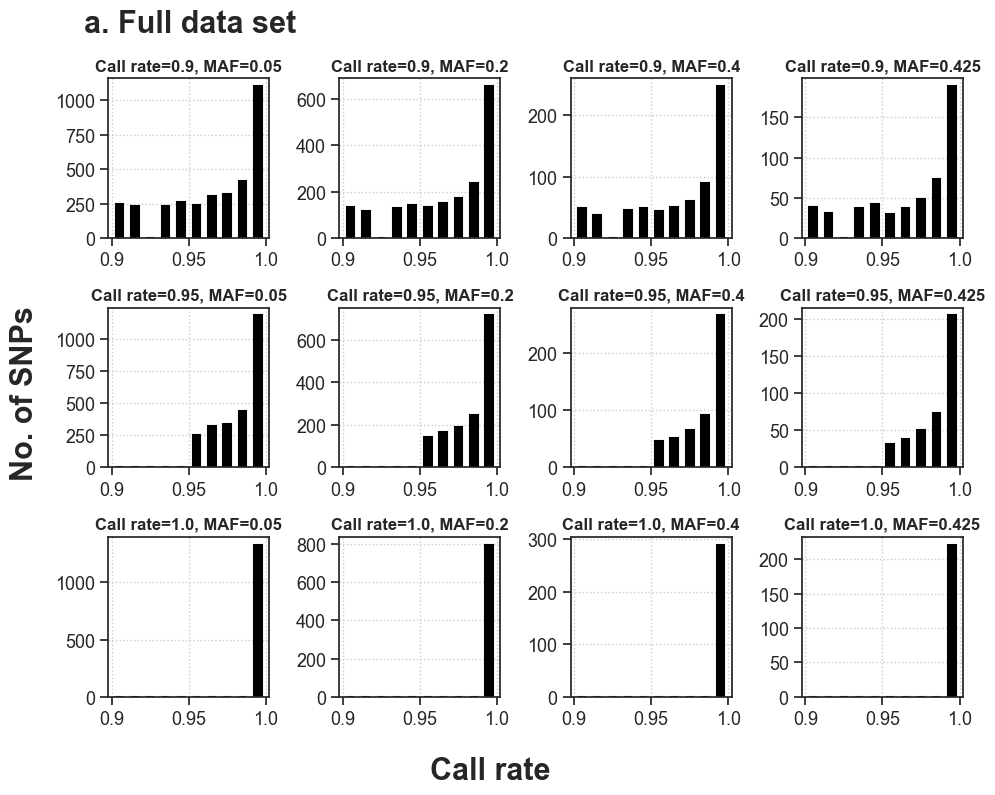

In [125]:

path = "/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/output/"

lists1 = ["snps_mindp20_maxdp200_imiss50_maf5_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf20_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf40_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf425_cr90_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf5_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf20_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf40_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf425_cr95_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf20_cr100_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf40_cr100_hwe_ld",
          "snps_mindp20_maxdp200_imiss50_maf425_cr100_hwe_ld"]

cr_maf = ['Call rate=0.9, MAF=0.05',
          'Call rate=0.9, MAF=0.2',
          'Call rate=0.9, MAF=0.4',
          'Call rate=0.9, MAF=0.425',
          'Call rate=0.95, MAF=0.05',
          'Call rate=0.95, MAF=0.2',
          'Call rate=0.95, MAF=0.4',
          'Call rate=0.95, MAF=0.425',
          'Call rate=1.0, MAF=0.05',
          'Call rate=1.0, MAF=0.2',
          'Call rate=1.0, MAF=0.4',
          'Call rate=1.0, MAF=0.425']

No = list(range(1,13,1))

sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(10,8))


i = 0
for lis in lists1:
    cr_name = path + lis + ".lmiss"
    
    # Missing
    df = pd.read_csv(cr_name, sep=' +')
    # CR
    cr = df["F_MISS"].astype(float)
    cr = 1 - cr
    
    # Number of SNPs
    SNPN = str(int(len(df.index)))
    
    # 階級の数を整数で指定する
    bins = np.linspace(0.9, 1.0, 11)
    cr2 = pd.cut(cr, bins,right=True)
    freq = pd.value_counts(cr2, sort=False)
    # 階級値、相対度数、累積度数、相対累積度数
    class_value = (bins[:-1] + bins[1:]) / 2  # 階級値
    rel_freq = freq / cr2.count()  # 相対度数
    cum_freq = freq.cumsum()  # 累積度数
    rel_cum_freq = rel_freq.cumsum()  # 相対累積度数
    # 度数分布表を作成
    dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
    )
    
    # Plot
    
    # new col.
    dist["rank"] = dist.index
    dist["order"] = list(range(1,11,1))
    dist["cr"] = np.arange(0.91,1.01,0.01).round(2)
    # Rename col
    dist = dist.rename(columns={"度数":"SNPs"})
    
    # Dist. Plot
    
    title = cr_maf[i] 
    
    ax = fig.add_subplot(3, 4, No[i])
    ax = plt.bar(dist["階級値"], dist["SNPs"], width=0.005, ec="black", lw=1.5, color="black")
    plt.title(title, fontweight="bold", fontsize=12)
    plt.xlabel("", fontsize=18)
    plt.ylabel("", fontsize=18)
    plt.xticks(np.arange(0.9,1.01,0.05),["0.9","0.95","1.0"],fontsize=13)
    plt.yticks(fontsize=13)

    fig.suptitle("a. Full data set", fontweight="bold", fontsize=22, x=0.2)
    fig.supxlabel('Call rate', fontsize=22, fontweight="bold")
    fig.supylabel('No. of SNPs', fontsize=22, fontweight="bold")
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')
    fig.tight_layout()
    
    
    i = i + 1
    
plt.savefig("CRdist_all.png",dpi=120, bbox_inches='tight')

## reduced data set

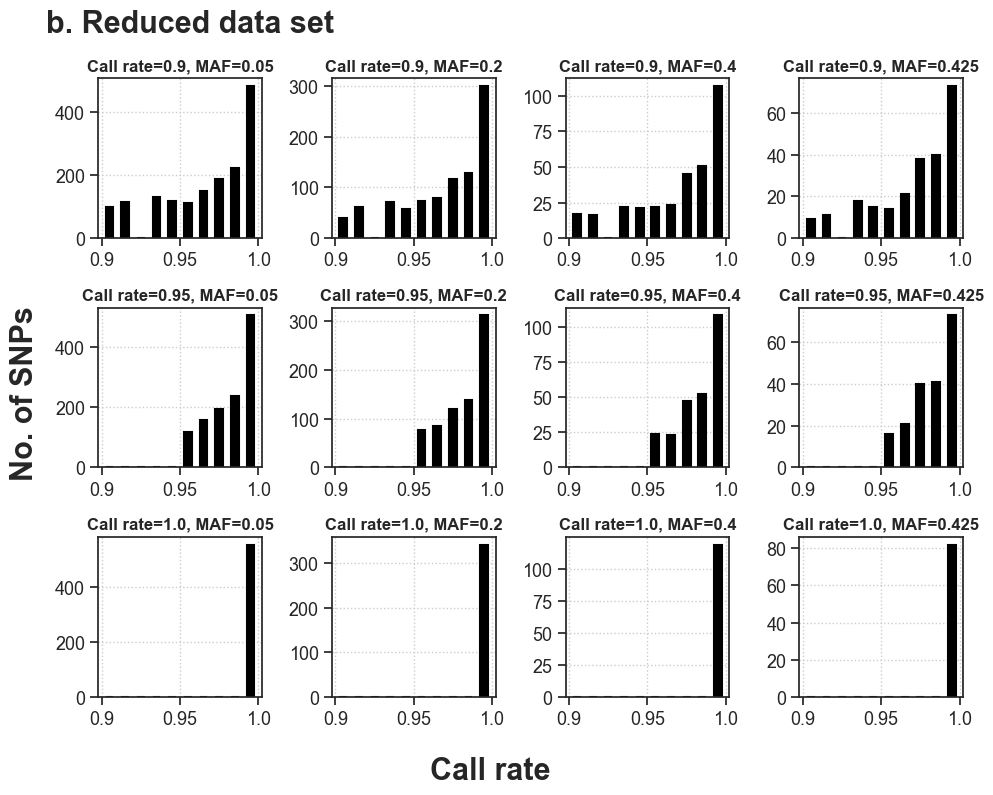

In [126]:

path = "/Users/nodashouhei/script/GRAS_Noda/アマゴゲノム_2020/pipeline23_PopulationEcology/output/"

lists2 = ["snps_down_mindp20_maxdp200_imiss50_maf5_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf20_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf40_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf425_cr90_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf5_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf20_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf40_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf425_cr95_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf20_cr100_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf40_cr100_hwe_ld",
          "snps_down_mindp20_maxdp200_imiss50_maf425_cr100_hwe_ld"]

cr_maf = ['Call rate=0.9, MAF=0.05',
          'Call rate=0.9, MAF=0.2',
          'Call rate=0.9, MAF=0.4',
          'Call rate=0.9, MAF=0.425',
          'Call rate=0.95, MAF=0.05',
          'Call rate=0.95, MAF=0.2',
          'Call rate=0.95, MAF=0.4',
          'Call rate=0.95, MAF=0.425',
          'Call rate=1.0, MAF=0.05',
          'Call rate=1.0, MAF=0.2',
          'Call rate=1.0, MAF=0.4',
          'Call rate=1.0, MAF=0.425']

No = list(range(1,13,1))

sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(10,8))


i = 0
for lis in lists2:
    cr_name = path + lis + ".lmiss"
    
    # Missing
    df = pd.read_csv(cr_name, sep=' +')
    # CR
    cr = df["F_MISS"].astype(float)
    cr = 1 - cr
    
    # Number of SNPs
    SNPN = str(int(len(df.index)))
    
    # 階級の数を整数で指定する
    bins = np.linspace(0.9, 1.0, 11)
    cr2 = pd.cut(cr, bins,right=True)
    freq = pd.value_counts(cr2, sort=False)
    # 階級値、相対度数、累積度数、相対累積度数
    class_value = (bins[:-1] + bins[1:]) / 2  # 階級値
    rel_freq = freq / cr2.count()  # 相対度数
    cum_freq = freq.cumsum()  # 累積度数
    rel_cum_freq = rel_freq.cumsum()  # 相対累積度数
    # 度数分布表を作成
    dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
    )
    
    # Plot
    
    # new col.
    dist["rank"] = dist.index
    dist["order"] = list(range(1,11,1))
    dist["cr"] = np.arange(0.91,1.01,0.01).round(2)
    # Rename col
    dist = dist.rename(columns={"度数":"SNPs"})
    
    # Dist. Plot
    
    title = cr_maf[i] 
    
    ax = fig.add_subplot(3, 4, No[i])
    ax = plt.bar(dist["階級値"], dist["SNPs"], width=0.005, ec="black", lw=1.5, color="black")
    plt.title(title, fontweight="bold", fontsize=12)
    plt.xlabel("", fontsize=18)
    plt.ylabel("", fontsize=18)
    plt.xticks(np.arange(0.9,1.01,0.05),["0.9","0.95","1.0"],fontsize=13)
    plt.yticks(fontsize=13)

    fig.suptitle("b. Reduced data set", fontweight="bold", fontsize=22, x=0.2)
    fig.supxlabel('Call rate', fontsize=22, fontweight="bold")
    fig.supylabel('No. of SNPs', fontsize=22, fontweight="bold")
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')
    fig.tight_layout()
    
    
    i = i + 1
    
plt.savefig("CRdist_reduced.png",dpi=120, bbox_inches='tight')

# No of SNPs

In [28]:
SNP = []
SNP_d = []
    
for lis in lists1:
    name = path + lis + ".frq"
    
    ma = pd.read_csv(name)
    snp = len(ma)
    SNP.append(snp)

for lis in lists2:
    name = path + lis + ".frq"
    
    ma = pd.read_csv(name)
    snp = len(ma)
    SNP_d.append(snp)
    
    
# New data
df = pd.DataFrame({'all data set': SNP,
                   'reduced data set': SNP_d},
                   index=cr_maf)

# to excel
df.to_csv("No_of_SNPs.csv")

# Make COLONY input files

## COLONY input file

In [7]:

sequoia_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/"

nos = list(range(1, 21, 1))

lists = lists1 + lists2

for no in nos:
    for lis in lists:
        seq = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) + ".txt"
        col = "./colony_input_files/" + lis + "_colony_error_0.01_miss_0.5_" + str(no) + ".txt"

        # 読み込み
        df = pd.read_csv(seq, sep=',', header=None)
        # 置換
        df2 = df.replace(0, '11,11')
        df2 = df2.replace(1, '11,22')
        df2 = df2.replace(2, '22,22')
        df2 = df2.replace(-9, '0,0')
        # 一時的に書き込み
        df2.to_csv("temp.txt", index = False, header=False, sep=",")

        # 読み込み
        with open("temp.txt") as reader:
            content = reader.read()

        # 置換
        content = content.replace(',', '\t')
        content = content.replace('"', '')

        # 書き出し
        with open(col, 'w') as writer:
            writer.write(content)

In [11]:
            
for no in nos:
    for lis in lists:
        
        col = "./colony_input_files/" + lis + "_colony_error_0.01_miss_0.5_" + str(no) + ".txt"
        col2 = "./colony_input_files/" + lis + "_colony_error_0.01_miss_0.5_" + str(no) + ".dat"

        # Road
        df = pd.read_csv(col, sep='\t', header=None)
        Olis =  pd.read_csv("Off2.txt")
        Mlis =  pd.read_csv("Dam2.txt")
        Dlis =  pd.read_csv("Sir2.txt")
        # rename
        df = df.rename(columns={0:'ID'})
        df = df.astype(str)
        # Marge 
        dfO = pd.merge(Olis, df, how="left", on = "ID")
        dfM = pd.merge(Mlis, df, how="left", on = "ID")
        dfD = pd.merge(Dlis, df, how="left", on = "ID")
        # Set index
        dfO = dfO.set_index('ID')
        dfM = dfM.set_index('ID')
        dfD = dfD.set_index('ID')

        # 欠損している行を削除
        dfO = dfO.dropna(how='any')
        dfM = dfM.dropna(how='any')
        dfD = dfD.dropna(how='any')

        # Make Dat file
        OffN = str(int(len(dfO))) + '         !Number of offspring in the sample\n'
        SNPsN = str(int(len(dfO.columns) / 2)) + '       !Number of loci\n'
        DadN = str(int(len(dfD)))
        MamN = str(int(len(dfM)))
        f = open(col2, 'w', newline="")
        f.write(f'{lis} !Dataset name\n')
        f.write(f'{lis}  !Output file name\n')
        f.write(OffN)
        f.write(SNPsN)
        f.write('1234       !Seed for random number generator\n')
        f.write('1          !0/1=Not updating/updating allele frequency\n')
        f.write('2          !2/1=Dioecious/Monoecious species\n')
        f.write('1          !0/1=No inbreeding/inbreeding\n')
        f.write('0          !0/1=Diploid species/HaploDiploid species\n')
        f.write('0 0        !0/1=Polygamy/Monogamy for males & females\n')
        f.write('0          !0/1=Clone inference =No/Yes\n')
        f.write('0          !0/1=Full sibship size scaling =No/Yes\n')
        f.write('0          !0,1,2,3=No,weak,medium,strong sibship size prior; mean paternal & meteral sibship size\n')
        f.write('0          !0/1=Unknown/Known population allele frequency\n')
        f.write('5          !Number of runs\n')
        f.write('2          !1/2/3/4=short/medium/long/very long run\n')
        f.write('0          !0/1=Monitor method by Iterate#/Time in second\n')
        f.write('100000     !Monitor interval in Iterate# / in seconds\n')
        f.write('0          !non-Windowsversion\n')
        f.write('2          !0/1/2=Analysis=Pairwise-LikelihoodScore/Full Likelihood/combined Pairwise-Likelihood Score and FullLikelihood\n')
        f.write('3          !! 0/1/2/3=Low/Medium/High/Veryhigh precision with Fulllikelihood\n')
        f.write('mk@        !MarkerIDs\n')
        f.write('0@         !Marker"types,"0/1=Codominant/Dominant\n')
        f.write('0.01@         !Allelic dropout rate\n')
        f.write('0.01@      !FALSE allele rate\n')
        f.write('\n')
        f.write(dfO.to_csv(sep=' ',header=False))
        f.write('\n')
        f.write('0.9 0.9       !prob. of dad/mum included in the candidates\n')
        f.write(f'{DadN} {MamN}      !Numbers of candidate males & females\n')
        f.write('\n')
        f.write(dfD.to_csv(sep=' ',header=False))
        f.write('\n')
        f.write(dfM.to_csv(sep=' ',header=False))
        f.write('\n')
        f.write('0 0        !known fater-offspring dyads, paternity exclusion threshold\n')
        f.write('0 0        !known moter-offspring dyads, maternity exclusion threshold\n')
        f.write('\n')
        f.write('0          !known paternal sibship with unknown fathers\n')
        f.write('0          !known maternal sibship with unknown mothers\n')
        f.write('\n')
        f.write('0          !Number of known paternal sibships\n')
        f.write('0          !Number of known maternal sibships\n')
        f.write('0          !Number of offspring with known excluded fathers\n')
        f.write('0          !Number of offspring with known excluded mothers\n')
        f.write('0          !Number of offspring with known excluded paternal sibships\n')
        f.write('0          !Number of offspring with known excluded maternal sibships\n')
        f.close()

## COLONY run script

In [24]:

for no in nos:
    name = "colony_run_script_simulated_data_" + str(no)
    sh = "./colony_input_files/" + name + ".sh"

    f = open(sh, 'w', newline="")
    f.write("### for 20240123\n")
    f.write("#!/bin/bash\n")
    f.write("#$ -S /bin/bash\n")
    f.write("#$ -pe def_slot 1\n")
    f.write("#$-l s_vmem=10G -l mem_req=10G\n")
    f.write("#$-l d_rt=100:00:00 -l s_rt=100:00:00\n")
    f.write("#$ -o /home/shohei-noda/GRASdi/logs -e /home/shohei-noda/GRASdi/logs\n")
    f.write("\n")
    f.write("Filename=(\n")
    
    for item in lists:
        f.write(str(item) + '\n')
        
    f.write(")\n")
    f.write("\n")
    f.write("for Name in \"${Filename[@]}\"")
    f.write("\n")
    f.write("do\n")
    f.write("\n")
    f.write("mkdir /home/shohei-noda/GRASdi/PE_2024/colony/${Name}_" + str(no) + "\n")
    f.write("\n")
    f.write("cd /home/shohei-noda/GRASdi/PE_2024/colony/${Name}_" + str(no) + "\n")
    f.write("\n")
    f.write("/home/shohei-noda/tools/Colony2/colony2s.ifort.out IFN:/home/shohei-noda/GRASdi/PE_2024/colony/${Name}_colony_error_0.01_miss_0.5_" + str(no) + ".dat\n")
    f.write("\n")
    f.write("done\n")
    f.write("\n")

    f.close()

# ...

# Simulation result (Fig.3)

In [1]:

list_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/filelist.csv"

lists = pd.read_csv(list_path)

# Make file list
cr_maf = lists["filtering"].to_list()
sets = lists["set"].to_list()
lists = lists["filename"].to_list()

## Sequoia

In [11]:
nos = list(range(1, 21, 1))

sequoia_path = "/Users/nodashouhei/Python/20240123_PE2023_Omi_GRASdi/sequoia_output_files/"

for no in nos:
    # Make Data Frame
    df_all = pd.DataFrame(columns=['SNP','MP1','FS1','HS1','GP1','FA1','U1','MP2','FS2','HS2','GP2','FA2','U2'],index=[0])
    
    out_name = "Accuracy_error_0.01_miss_0.5_" + str(no) + "_accuracy.csv"
    
    i = 0
    for lis in lists:
        in_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_PairL.csv"
    
        # Accuracy Data
        ped = pd.read_csv(in_name, index_col=0)
        # Need data
        ped = ped[['MP','O','FS','HS','GP','FA','U']]
        ped = ped.drop(index = "X")
        # Transepose
        ped2 = ped.T
        # 判別数を全体の数で割る
        # false-positive rates (the per-pair rate at which unrelated individuals are incorrectly inferred to be related with the specified relationship)
        MP1 = ped.at["MP","MP"]/sum(ped["MP"])
        FS1 = ped.at["FS","FS"]/sum(ped["FS"])
        HS1 = ped.at["HS","HS"]/sum(ped["HS"])
        GP1 = ped.at["GP","GP"]/sum(ped["GP"])
        FA1 = ped.at["FA","FA"]/sum(ped["FA"])
        U1 = ped.at["U","U"]/sum(ped["U"])
        # false-negative rates (the per-pair rate at which related individuals are incorrectly inferred to be unrelated with the specified relationship)
        MP2 = ped2.at["MP","MP"]/sum(ped2["MP"])
        FS2 = ped2.at["FS","FS"]/sum(ped2["FS"])
        HS2 = ped2.at["HS","HS"]/sum(ped2["HS"])
        GP2 = ped2.at["GP","GP"]/sum(ped2["GP"])
        FA2 = ped2.at["FA","FA"]/sum(ped2["FA"])
        U2 = ped2.at["U","U"]/sum(ped2["U"])
        

        # New data
        df = pd.DataFrame({'ID': [lists[i]],
                           'Set': [sets[i]],
                           'SNP': [cr_maf[i]],
                           'MP1': MP1,
                           'FS1': FS1,
                           'HS1': HS1,
                           'GP1': GP1,
                           'FA1': FA1,
                           'U1': U1,
                           'MP2': MP2,
                           'FS2': FS2,
                           'HS2': HS2,
                           'GP2': GP2,
                           'FA2': FA2,
                           'U2': U2},
                           index=[i+1])
        # Merge
        df_all = pd.concat([df_all, df], axis=0)
        # Drop index
        df_all = df_all.dropna(subset=['SNP'])
        
        i = i + 1
    
    # csv out
    df_all.to_csv(out_name,index=None)  

### Calc. mean of accuracy rate

In [12]:

mean_name = "Accuracy_error_0.01_miss_0.5_accuracy_mean.csv"

# Make Data Frame
df_all = pd.DataFrame(columns=['SNP','MP1','FS1','HS1','GP1','FA1','U1','MP2','FS2','HS2','GP2','FA2','U2'],index=[])

for no in nos:   
    in_name = "Accuracy_error_0.01_miss_0.5_" + str(no) + "_accuracy.csv"
    
    # Accuracy Data
    df = pd.read_csv(in_name)
    # Merge
    df_all = pd.concat([df_all, df], axis=0)
    # Cals. Mean value
    mean = df_all.groupby(["Set","SNP"]).mean()
    
# csv out
mean = mean.reset_index(level='Set')
mean.to_csv(mean_name)

### Calc. SD of accuracy rate

In [13]:

std_name = "Accuracy_error_0.01_miss_0.5_accuracy_std.csv"

# Make Data Frame
df_all = pd.DataFrame(columns=['SNP','MP1','FS1','HS1','GP1','FA1','U1','MP2','FS2','HS2','GP2','FA2','U2'],index=[])

for no in nos:   
    in_name = "Accuracy_error_0.01_miss_0.5_" + str(no) + "_accuracy.csv"
    
    # Accuracy Data
    df = pd.read_csv(in_name)
    # Merge
    df_all = pd.concat([df_all, df], axis=0)
    # Cals. Mean value
    std = df_all.groupby(["Set","SNP"]).std()
    
# csv out
std = std.reset_index(level='Set')
std.to_csv(std_name)

## COLONY

In [14]:
nos = list(range(1, 21, 1))



for no in nos:
    # Make Data Frame
    df_all = pd.DataFrame(columns=['SNP','MP1','FS1','HS1','GP1','FA1','U1','MP2','FS2','HS2','GP2','FA2','U2'],index=[0])
    
    out_name = "Accuracy_error_0.01_miss_0.5_" + str(no) + "_colony_accuracy.csv"
    
    i = 0
    for lis in lists:
        in_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_colony_PairL.csv"
    
        # Accuracy Data
        ped = pd.read_csv(in_name, index_col=0)
        # Need data
        ped = ped[['MP','O','FS','HS','GP','FA','U']]
        ped = ped.drop(index = "X")
        # Transepose
        ped2 = ped.T
        # 判別数を全体の数で割る
        # false-positive rates (the per-pair rate at which unrelated individuals are incorrectly inferred to be related with the specified relationship)
        MP1 = ped.at["MP","MP"]/sum(ped["MP"])
        FS1 = ped.at["FS","FS"]/sum(ped["FS"])
        HS1 = ped.at["HS","HS"]/sum(ped["HS"])
        GP1 = ped.at["GP","GP"]/sum(ped["GP"])
        FA1 = ped.at["FA","FA"]/sum(ped["FA"])
        U1 = ped.at["U","U"]/sum(ped["U"])
        # false-negative rates (the per-pair rate at which related individuals are incorrectly inferred to be unrelated with the specified relationship)
        MP2 = ped2.at["MP","MP"]/sum(ped2["MP"])
        FS2 = ped2.at["FS","FS"]/sum(ped2["FS"])
        HS2 = ped2.at["HS","HS"]/sum(ped2["HS"])
        GP2 = ped2.at["GP","GP"]/sum(ped2["GP"])
        FA2 = ped2.at["FA","FA"]/sum(ped2["FA"])
        U2 = ped2.at["U","U"]/sum(ped2["U"])
        

        # New data
        df = pd.DataFrame({'ID': [lists[i]],
                           'Set': [sets[i]],
                           'SNP': [cr_maf[i]],
                           'MP1': MP1,
                           'FS1': FS1,
                           'HS1': HS1,
                           'GP1': GP1,
                           'FA1': FA1,
                           'U1': U1,
                           'MP2': MP2,
                           'FS2': FS2,
                           'HS2': HS2,
                           'GP2': GP2,
                           'FA2': FA2,
                           'U2': U2},
                           index=[i+1])
        # Merge
        df_all = pd.concat([df_all, df], axis=0)
        # Drop index
        df_all = df_all.dropna(subset=['SNP'])
        
        i = i + 1
    
    # csv out
    df_all.to_csv(out_name,index=None)  

### Calc. mean of accuracy rate

In [15]:

mean_name = "Accuracy_error_0.01_miss_0.5_accuracy_mean_colony.csv"

# Make Data Frame
df_all = pd.DataFrame(columns=['SNP','MP1','FS1','HS1','GP1','FA1','U1','MP2','FS2','HS2','GP2','FA2','U2'],index=[])

for no in nos:   
    in_name = "Accuracy_error_0.01_miss_0.5_" + str(no) + "_colony_accuracy.csv"
    
    # Accuracy Data
    df = pd.read_csv(in_name)
    # Merge
    df_all = pd.concat([df_all, df], axis=0)
    # Cals. Mean value
    mean = df_all.groupby(["Set","SNP"]).mean()
    
# csv out
mean = mean.reset_index(level='Set')
mean.to_csv(mean_name)

### Calc. SD of accuracy rate

In [16]:

std_name = "Accuracy_error_0.01_miss_0.5_accuracy_std_colony.csv"

# Make Data Frame
df_all = pd.DataFrame(columns=['SNP','MP1','FS1','HS1','GP1','FA1','U1','MP2','FS2','HS2','GP2','FA2','U2'],index=[])

for no in nos:   
    in_name = "Accuracy_error_0.01_miss_0.5_" + str(no) + "_colony_accuracy.csv"
    
    # Accuracy Data
    df = pd.read_csv(in_name)
    # Merge
    df_all = pd.concat([df_all, df], axis=0)
    # Cals. Mean value
    std = df_all.groupby(["Set","SNP"]).std()
    
# csv out
std = std.reset_index(level='Set')
std.to_csv(std_name)

## Plot

In [17]:
# Road Data
mean = pd.read_csv("Accuracy_error_0.01_miss_0.5_accuracy_mean.csv")
std = pd.read_csv("Accuracy_error_0.01_miss_0.5_accuracy_std.csv")
mean_colony = pd.read_csv("Accuracy_error_0.01_miss_0.5_accuracy_mean_colony.csv")
std_colony = pd.read_csv("Accuracy_error_0.01_miss_0.5_accuracy_std_colony.csv")

# SNP data
snp = pd.read_csv("No_of_SNPs.csv")


# Sequoia
mean_all = mean[(mean['Set']=="all")]
mean_reduced = mean[(mean['Set']=="reduced")]
std_all = std[(std['Set']=="all")]
std_reduced = std[(std['Set']=="reduced")]
# Colony
mean_all_colony = mean_colony[(mean_colony['Set']=="all")]
mean_reduced_colony = mean_colony[(mean_colony['Set']=="reduced")]
std_all_colony = std_colony[(std_colony['Set']=="all")]
std_reduced_colony = std_colony[(std_colony['Set']=="reduced")]

# new col.
mean_all['x'] = range(1,13,1)
mean_reduced['x'] = range(1,13,1)

mean_all_colony['x'] = range(1,13,1)
mean_reduced_colony['x'] = range(1,13,1)

snp['x'] = range(1,13,1)

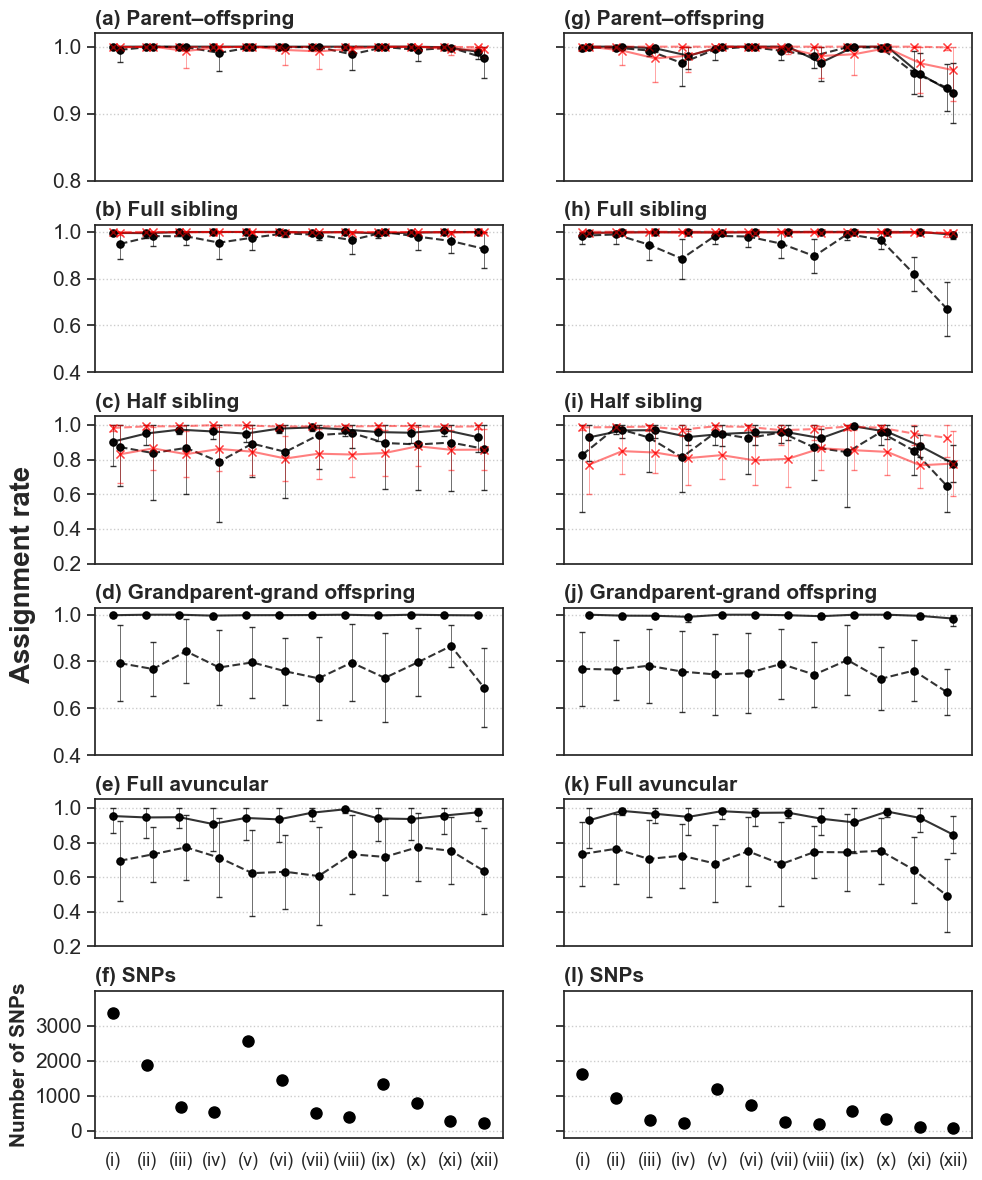

In [18]:
### Plot
sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(10,12))

png_name = "Fig3_accuracy_colony_error_0.01_miss_0.5.png"

rel_list = ["MP","FS","HS","GP","FA"]

title_list1 = ["(a) Parent–offspring",
               "(b) Full sibling ",
               "(c) Half sibling ",
               "(d) Grandparent-grand offspring",
               "(e) Full avuncular"]

title_list2 = ["(g) Parent–offspring",
               "(h) Full sibling ",
               "(i) Half sibling ",
               "(j) Grandparent-grand offspring",
               "(k) Full avuncular"]

ylim_max = [1.02,1.03,1.05,1.03,1.05]
ylim_min = [0.8,0.4,0.2,0.4,0.2]
yticks = [0.1,0.2,0.2,0.2,0.2]

# All
a = 0
aa = 1
for lis in rel_list:
    
    ax = fig.add_subplot(6, 2, aa)
    
    REL1 = lis + "1"
    REL2 = lis + "2"
    
    # Sequoia
    # False positive
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_all[REL1].to_list()
    lower = std_all[REL1].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp1 = [lower,upper2]
    
    # False negative
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_all[REL2].to_list()
    lower = std_all[REL2].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp2 = [lower,upper2]
    
    
    ax.plot(mean_all["x"]-0.1, mean_all[REL1], lw=1.5, color = 'black', marker='o', markersize = 5, alpha=0.8, linestyle = "solid")
    ax.plot(mean_all["x"]+0.1, mean_all[REL2], lw=1.5, color = 'black', marker='o', markersize = 5, alpha=0.8, linestyle = "dashed")
    ax.errorbar(mean_all["x"]-0.1, mean_all[REL1], yerr=tmp1, lw=0.5, markersize = 5, alpha=0.8, capsize=2, fmt='o', ecolor='black', color='black')
    ax.errorbar(mean_all["x"]+0.1, mean_all[REL2], yerr=tmp2, lw=0.5, markersize = 5, alpha=0.8, capsize=2, fmt='o', ecolor='black', color='black')
    
    # Colony
    # False positive
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_all_colony[REL1].to_list()
    lower = std_all_colony[REL1].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp1 = [lower,upper2]
    
    # False negative
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_all_colony[REL2].to_list()
    lower = std_all_colony[REL2].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp2 = [lower,upper2]
    
    
    ax.plot(mean_all_colony["x"]+0.1, mean_all_colony[REL1], lw=1.5, color = 'red', marker='x', markersize = 6, alpha=0.5, linestyle = "solid")
    ax.plot(mean_all_colony["x"]-0.1, mean_all_colony[REL2], lw=1.5, color = 'red', marker='x', markersize = 6, alpha=0.5, linestyle = "dashed")
    ax.errorbar(mean_all_colony["x"]+0.1, mean_all_colony[REL1], yerr=tmp1, lw=0.5, markersize = 6, alpha=0.5, capsize=2, fmt='x', ecolor='red', color='red')
    ax.errorbar(mean_all_colony["x"]-0.1, mean_all_colony[REL2], yerr=tmp2, lw=0.5, markersize = 6, alpha=0.5, capsize=2, fmt='x', ecolor='red', color='red')
    
    
    plt.title(title_list1[a], fontweight="bold", fontsize=15, loc="left")
    plt.xticks([],fontsize=15)
    plt.yticks(np.arange(0,1.5,yticks[a]), fontsize=15)
    plt.ylim([ylim_min[a],ylim_max[a]])
    
    fig.suptitle("", fontweight="bold", fontsize=20)
    fig.supxlabel('', fontsize=20)
    fig.supylabel('Assignment rate', fontsize=20, fontweight="bold")
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')
    
    fig.tight_layout()
    
    a = a + 1
    aa = aa + 2

    
# Reduced
a = 0
aa = 2
for lis in rel_list:
    
    ax = fig.add_subplot(6, 2, aa)
    
    REL1 = lis + "1"
    REL2 = lis + "2"
    
    # Sequoia
    # False positive
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_reduced[REL1].to_list()
    lower = std_reduced[REL1].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp1 = [lower,upper2]
    
    # False negative
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_reduced[REL2].to_list()
    lower = std_reduced[REL2].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp2 = [lower,upper2]
    
    
    ax.plot(mean_reduced["x"]+0.1, mean_reduced[REL1], lw=1.5, color = 'black', marker='o', markersize = 5, alpha=0.8, linestyle = "solid")
    ax.plot(mean_reduced["x"]-0.1, mean_reduced[REL2], lw=1.5, color = 'black', marker='o', markersize = 5, alpha=0.8, linestyle = "dashed")
    ax.errorbar(mean_reduced["x"]+0.1, mean_reduced[REL1], yerr=tmp1, lw=0.5, markersize = 5, alpha=0.8, capsize=2, fmt='o', ecolor='black', color='black')
    ax.errorbar(mean_reduced["x"]-0.1, mean_reduced[REL2], yerr=tmp2, lw=0.5, markersize = 5, alpha=0.8, capsize=2, fmt='o', ecolor='black', color='black')
    
    
    
    # Colony
    # False positive
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_reduced_colony[REL1].to_list()
    lower = std_reduced_colony[REL1].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp1 = [lower,upper2]
    
    # False negative
    # 標準偏差が1を超えるものを修正
    # Make list
    mean_tmp = mean_reduced_colony[REL2].to_list()
    lower = std_reduced_colony[REL2].to_list()
    
    tmp = 0
    upper = []
    
    # Calcurate upper values
    for i in range(len(mean_tmp)):
        tmp = mean_tmp[i] + lower[i]
        upper.append(tmp)

    upper2 = []
    
    # Recalcurate upper SD
    for i in range(len(mean_tmp)):
        if upper[i]>1:
            tmp = 1 - mean_tmp[i]
            upper2.append(tmp)
        else:
            tmp = lower[i]
            upper2.append(tmp)
    
    # Make error bar        
    tmp2 = [lower,upper2]
    
    
    ax.plot(mean_reduced_colony["x"]+0.1, mean_reduced_colony[REL1], lw=1.5, color = 'red', marker='x', markersize = 6, alpha=0.5, linestyle = "solid")
    ax.plot(mean_reduced_colony["x"]-0.1, mean_reduced_colony[REL2], lw=1.5, color = 'red', marker='x', markersize = 6, alpha=0.5, linestyle = "dashed")
    ax.errorbar(mean_reduced_colony["x"]+0.1, mean_reduced_colony[REL1], yerr=tmp1, lw=0.5, markersize = 6, alpha=0.5, capsize=2, fmt='x', ecolor='red', color='red')
    ax.errorbar(mean_reduced_colony["x"]-0.1, mean_reduced_colony[REL2], yerr=tmp2, lw=0.5, markersize = 6, alpha=0.5, capsize=2, fmt='x', ecolor='red', color='red')
    
    
    plt.title(title_list2[a], fontweight="bold", fontsize=15, loc="left")
    plt.xticks([],fontsize=15)
    plt.yticks(np.arange(0,1.5,yticks[a]), fontsize=15, color = 'w')
    plt.ylim([ylim_min[a],ylim_max[a]])
    
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')
    
    a = a + 1
    aa = aa + 2
    
# Number of SNPs
ax = fig.add_subplot(6, 2, 11)
plt.title("(f) SNPs", fontweight="bold", fontsize=15, loc="left")
ax.plot(snp["x"], snp["all data set"], lw=0, color = 'black', marker='o', markersize = 8, alpha=1)
plt.xticks([],fontsize=15)
plt.yticks(range(0,4000,1000), fontsize=15)
plt.ylim([-200,4000])
plt.ylabel("Number of SNPs", fontsize=15, fontweight="bold")
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')

# テキストを挿入
plt.text(1, -1000, "(i)", ha="center", fontsize=13)
plt.text(2, -1000, "(ii)", ha="center", fontsize=13)
plt.text(3, -1000, "(iii)", ha="center", fontsize=13)
plt.text(4, -1000, "(iv)", ha="center", fontsize=13)
plt.text(5, -1000, "(v)", ha="center", fontsize=13)
plt.text(6, -1000, "(vi)", ha="center", fontsize=13)
plt.text(7, -1000, "(vii)", ha="center", fontsize=13)
plt.text(8, -1000, "(viii)", ha="center", fontsize=13)
plt.text(9, -1000, "(ix)", ha="center", fontsize=13)
plt.text(10, -1000, "(x)", ha="center", fontsize=13)
plt.text(11, -1000, "(xi)", ha="center", fontsize=13)
plt.text(12, -1000, "(xii)", ha="center", fontsize=13)

ax = fig.add_subplot(6, 2, 12)
plt.title("(l) SNPs", fontweight="bold", fontsize=15, loc="left")
ax.plot(snp["x"], snp["reduced data set"], lw=0, color = 'black', marker='o', markersize = 8, alpha=1)
plt.xticks([],fontsize=15)
plt.yticks(range(0,4000,1000), fontsize=15, color = 'w')
plt.ylim([-200,4000])
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')

# テキストを挿入
plt.text(1, -1000, "(i)", ha="center", fontsize=13)
plt.text(2, -1000, "(ii)", ha="center", fontsize=13)
plt.text(3, -1000, "(iii)", ha="center", fontsize=13)
plt.text(4, -1000, "(iv)", ha="center", fontsize=13)
plt.text(5, -1000, "(v)", ha="center", fontsize=13)
plt.text(6, -1000, "(vi)", ha="center", fontsize=13)
plt.text(7, -1000, "(vii)", ha="center", fontsize=13)
plt.text(8, -1000, "(viii)", ha="center", fontsize=13)
plt.text(9, -1000, "(ix)", ha="center", fontsize=13)
plt.text(10, -1000, "(x)", ha="center", fontsize=13)
plt.text(11, -1000, "(xi)", ha="center", fontsize=13)
plt.text(12, -1000, "(xii)", ha="center", fontsize=13)

plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.savefig(png_name ,dpi=400, bbox_inches='tight')

# Calc. LLR of simulation data (Figure S3)

In [23]:
nos = list(range(1, 21, 1))

sequoia_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/"

# Make Data Frame
po_all = pd.DataFrame(columns=['cr_maf','sets','LLR'],index=[])
fs_all = pd.DataFrame(columns=['cr_maf','sets','LLR'],index=[])
hs_all = pd.DataFrame(columns=['cr_maf','sets','LLR'],index=[])
fa_all = pd.DataFrame(columns=['cr_maf','sets','LLR'],index=[])
gp_all = pd.DataFrame(columns=['cr_maf','sets','LLR'],index=[])

i = 0
for lis in lists:
    for no in nos:
        po_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_CalcPairLL_PO.csv"
        fs_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_CalcPairLL_FS.csv"
        hs_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_CalcPairLL_HS.csv"
        fa_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_CalcPairLL_FA.csv"
        gp_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_CalcPairLL_GP.csv"
        
        # Road Data
        po = pd.read_csv(po_name, index_col=0)
        fs = pd.read_csv(fs_name, index_col=0)
        hs = pd.read_csv(hs_name, index_col=0)
        gp = pd.read_csv(gp_name, index_col=0)
        fa = pd.read_csv(fa_name, index_col=0)
        
        # New data
        # PO   
        po["po_u"] = po["PO"] - po["U"]
        po["po_fs"] = po["PO"] - po["FS"]
        po["po_hs"] = po["PO"] - po["HS"]
        po["po_gp"] = po["PO"] - po["GP"]
        po["po_fa"] = po["PO"] - po["FA"]

        # FS
        fs["fs_u"] = fs["FS"] - fs["U"]
        fs["fs_po"] = fs["FS"] - fs["PO"]
        fs["fs_hs"] = fs["FS"] - fs["HS"]
        fs["fs_gp"] = fs["FS"] - fs["GP"]
        fs["fs_fa"] = fs["FS"] - fs["FA"]

        # HS   
        hs["hs_u"] = hs["HS"] - hs["U"]
        hs["hs_fs"] = hs["HS"] - hs["FS"]
        hs["hs_po"] = hs["HS"] - hs["PO"]
        hs["hs_gp"] = hs["HS"] - hs["GP"]
        hs["hs_fa"] = hs["HS"] - hs["FA"]

        # GP
        gp["gp_u"] = gp["GP"] - gp["U"]
        gp["gp_fs"] = gp["GP"] - gp["FS"]
        gp["gp_hs"] = gp["GP"] - gp["HS"]
        gp["gp_po"] = gp["GP"] - gp["PO"]
        gp["gp_fa"] = gp["GP"] - gp["FA"]

        # FA   
        fa["fa_u"] = fa["FA"] - fa["U"]
        fa["fa_fs"] = fa["FA"] - fa["FS"]
        fa["fa_hs"] = fa["FA"] - fa["HS"]
        fa["fa_gp"] = fa["FA"] - fa["GP"]
        fa["fa_po"] = fa["FA"] - fa["PO"]
        
        po = po["po_u"].to_list()+po["po_fs"].to_list()+po["po_hs"].to_list()+po["po_gp"].to_list()+po["po_fa"].to_list()
        fs = fs["fs_u"].to_list()+fs["fs_po"].to_list()+fs["fs_hs"].to_list()+fs["fs_gp"].to_list()+fs["fs_fa"].to_list()
        hs = hs["hs_u"].to_list()+hs["hs_fs"].to_list()+hs["hs_po"].to_list()+hs["hs_gp"].to_list()+hs["hs_fa"].to_list()
        gp = gp["gp_u"].to_list()+gp["gp_fs"].to_list()+gp["gp_hs"].to_list()+gp["gp_po"].to_list()+gp["gp_fa"].to_list()
        fa = fa["fa_u"].to_list()+fa["fa_fs"].to_list()+fa["fa_hs"].to_list()+fa["fa_gp"].to_list()+fa["fa_po"].to_list()

        po = pd.DataFrame(({'LLR': po,'cr_maf': cr_maf[i],'sets': sets[i]}))
        fs = pd.DataFrame(({'LLR': fs,'cr_maf': cr_maf[i],'sets': sets[i]}))
        hs = pd.DataFrame(({'LLR': hs,'cr_maf': cr_maf[i],'sets': sets[i]}))
        gp = pd.DataFrame(({'LLR': gp,'cr_maf': cr_maf[i],'sets': sets[i]}))
        fa = pd.DataFrame(({'LLR': fa,'cr_maf': cr_maf[i],'sets': sets[i]}))
        
        # concat
        po_all = pd.concat([po_all,po], axis=0)
        fs_all = pd.concat([fs_all,fs], axis=0)
        hs_all = pd.concat([hs_all,hs], axis=0)
        gp_all = pd.concat([gp_all,gp], axis=0)
        fa_all = pd.concat([fa_all,fa], axis=0)
        
    i = i + 1

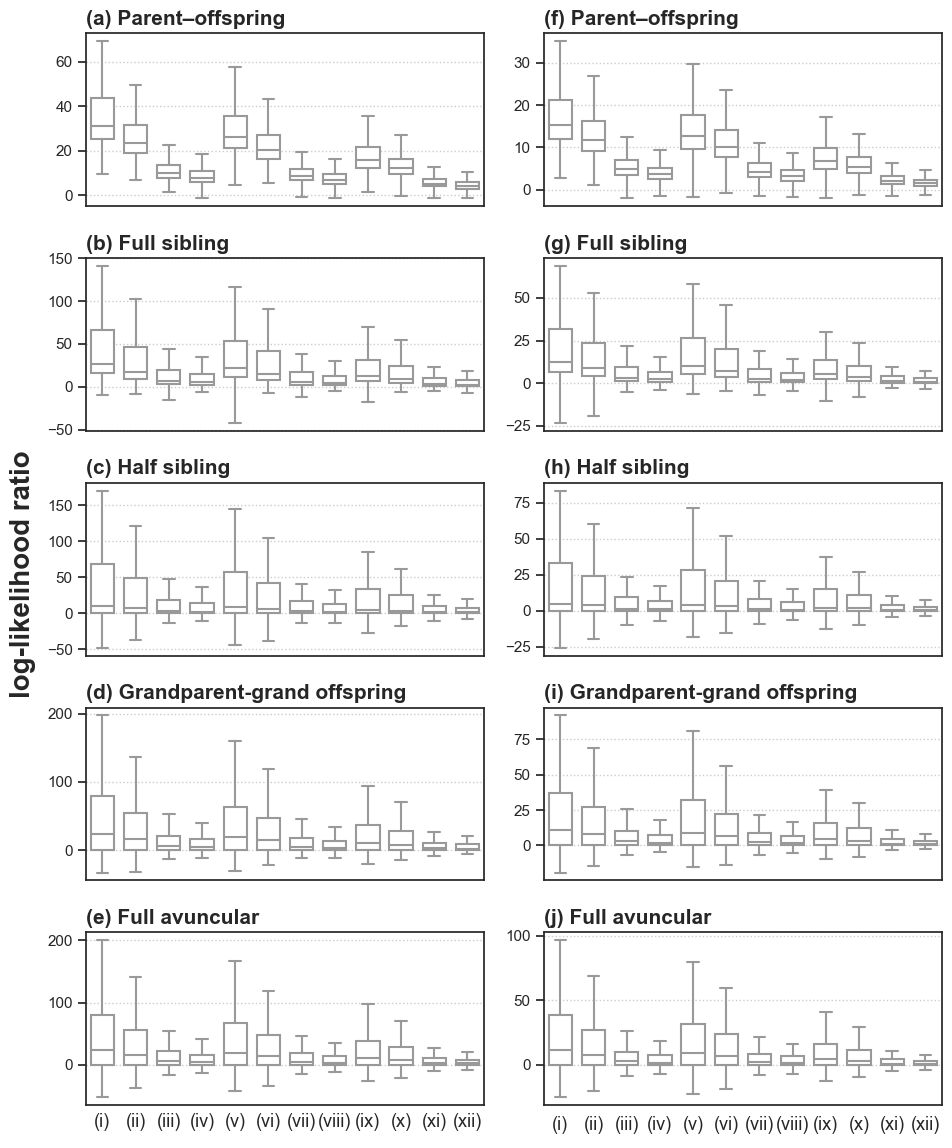

In [81]:
### Plot
sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(10,12))

png_name = "FigS3_LLR_sequoia_error_0.01_miss_0.5.png"

rel_list = [po_all,fs_all,hs_all,gp_all,fa_all]

title_list1 = ["(a) Parent–offspring",
               "(b) Full sibling ",
               "(c) Half sibling ",
               "(d) Grandparent-grand offspring",
               "(e) Full avuncular"]

title_list2 = ["(f) Parent–offspring",
               "(g) Full sibling ",
               "(h) Half sibling ",
               "(i) Grandparent-grand offspring",
               "(j) Full avuncular"]

# All
i = 0
ii = 1
for lis in rel_list:
    
    ax = fig.add_subplot(5, 2, ii)
    
    tmp = lis[lis["sets"] == "all"]
    
    sns.boxplot(x='cr_maf', y='LLR', data=tmp, color="white", showfliers=False, width=0.7)
    #sns.stripplot(x='cr_maf', y='LLR', data=lis, jitter=True, color='black', alpha=0.01, size=1)
    
    plt.title(title_list1[i], fontweight="bold", fontsize=15, loc="left")
    plt.xticks([],fontsize=15)
    plt.xlabel(" ",fontsize=15, alpha=1)
    plt.ylabel(" ",fontsize=15, alpha=1)
    
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')

    i = i + 1
    ii = ii + 2

# テキストを挿入
plt.text(0, -100, "(i)", ha="center", fontsize=13)
plt.text(1, -100, "(ii)", ha="center", fontsize=13)
plt.text(2, -100, "(iii)", ha="center", fontsize=13)
plt.text(3, -100, "(iv)", ha="center", fontsize=13)
plt.text(4, -100, "(v)", ha="center", fontsize=13)
plt.text(5, -100, "(vi)", ha="center", fontsize=13)
plt.text(6, -100, "(vii)", ha="center", fontsize=13)
plt.text(7, -100, "(viii)", ha="center", fontsize=13)
plt.text(8, -100, "(ix)", ha="center", fontsize=13)
plt.text(9, -100, "(x)", ha="center", fontsize=13)
plt.text(10, -100, "(xi)", ha="center", fontsize=13)
plt.text(11, -100, "(xii)", ha="center", fontsize=13)

# Reduced
i = 0
ii = 2
for lis in rel_list:
    
    ax = fig.add_subplot(5, 2, ii)
    
    tmp = lis[lis["sets"] == "reduced"]
    
    sns.boxplot(x='cr_maf', y='LLR', data=tmp, color="white", showfliers=False, width=0.7)
    #sns.stripplot(x='cr_maf', y='LLR', data=lis, jitter=True, color='black', alpha=0.01, size=1)
    
    plt.title(title_list2[i], fontweight="bold", fontsize=15, loc="left")
    plt.xticks([],fontsize=15)
    plt.xlabel(" ",fontsize=15, alpha=1)
    plt.ylabel(" ",fontsize=1, alpha=1)
    
    plt.grid(axis='x', linestyle='dotted')
    plt.grid(axis='y', linestyle='dotted')

    i = i + 1
    ii = ii + 2
    
fig.suptitle("", fontweight="bold", fontsize=20)
fig.supxlabel('', fontsize=20)
fig.supylabel('log-likelihood ratio', fontsize=20, fontweight="bold", x=0.05)
fig.tight_layout()

# テキストを挿入
plt.text(0, -50, "(i)", ha="center", fontsize=13)
plt.text(1, -50, "(ii)", ha="center", fontsize=13)
plt.text(2, -50, "(iii)", ha="center", fontsize=13)
plt.text(3, -50, "(iv)", ha="center", fontsize=13)
plt.text(4, -50, "(v)", ha="center", fontsize=13)
plt.text(5, -50, "(vi)", ha="center", fontsize=13)
plt.text(6, -50, "(vii)", ha="center", fontsize=13)
plt.text(7, -50, "(viii)", ha="center", fontsize=13)
plt.text(8, -50, "(ix)", ha="center", fontsize=13)
plt.text(9, -50, "(x)", ha="center", fontsize=13)
plt.text(10, -50, "(xi)", ha="center", fontsize=13)
plt.text(11, -50, "(xii)", ha="center", fontsize=13)

plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.savefig(png_name ,dpi=400, bbox_inches='tight')

# Simulation result (Table S1 & S2)

In [3]:

list_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/filelist.csv"

lists = pd.read_csv(list_path)

# Make file list
lists = lists["filename"].to_list()

## Sequoia

In [4]:
nos = list(range(1, 21, 1))

sequoia_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/"

for lis in lists:
    # Make Data Frame
    df = pd.DataFrame(0,columns=['MP','O','FS','HS','GP','GO','FA','FN','HA','HN','DFC1','FC1','U','X'],
                      index=['MP','O','FS','HS','GP','GO','FA','FN','HA','HN','DFC1','FC1','U','X'])
    
    out_name = "sequoia_sim_" + lis + "_error_0.01_miss_0.5_FP_FN.csv"
    
    for no in nos:
        in_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_PairL.csv"
        
        # Accuracy Data
        df_sub = pd.read_csv(in_name, index_col=0)
        
        df = df + df_sub
        df = df.fillna(0)
    
    # reindex
    df = df.reindex(index=['MP','FS','HS','GP','FA','FN','HA','HN','DFC1','FC1','U','X'])
    # recolumn
    df = df[['MP','FS','HS','GP','FA','FN','HA','HN','DFC1','FC1','U','X']]
    
    # rename
    df = df.rename(columns={'MP':'PO'})
    df = df.rename(index={'MP':'PO'})
    
    # csv out
    df.to_csv(out_name)

## COLONY

In [5]:
nos = list(range(1, 21, 1))

sequoia_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/"

for lis in lists:
    # Make Data Frame
    df = pd.DataFrame(0,columns=['MP','O','FS','HS','GP','GO','FA','FN','HA','HN','DFC1','FC1','U','X'],
                      index=['MP','O','FS','HS','GP','GO','FA','FN','HA','HN','DFC1','FC1','U','X'])
    
    out_name = "sequoia_sim_" + lis + "_error_0.01_miss_0.5_colony_FP_FN.csv"
    
    for no in nos:
        in_name = sequoia_path + lis + "_error_0.01_miss_0.5_" + str(no) +"_colony_PairL.csv"
        
        # Accuracy Data
        df_sub = pd.read_csv(in_name, index_col=0)
        
        df = df + df_sub
        df = df.fillna(0)
    
    # reindex
    df = df.reindex(index=['MP','FS','HS','GP','FA','FN','HA','HN','DFC1','FC1','U','X'])
    # recolumn
    df = df[['MP','FS','HS','GP','FA','FN','HA','HN','DFC1','FC1','U','X']]
    
    # rename
    df = df.rename(columns={'MP':'PO'})
    df = df.rename(index={'MP':'PO'})
    
    # csv out
    df.to_csv(out_name)

## Out all tables

In [6]:

txt_path = "TableS_title_list.xlsx"

texts = pd.read_excel(txt_path)
texts = texts["text"].to_list()

# COLONY
f = open("colony_FP_FN.txt", 'w', newline="")
f.write('\n')
f.close()

i = 0
for lis in lists:
    in_name = "sequoia_sim_" + lis + "_error_0.01_miss_0.5_colony_FP_FN.csv"
    # Accuracy Data
    df = pd.read_csv(in_name, index_col=0)
    
    # sum indexs
    #df = df.assign(SUM = df.sum(axis=1))
    # sum columns
    #df.loc['SUM'] = df.sum()

    f = open("colony_FP_FN.txt", 'a', newline="")
    f.write(texts[i])
    f.write('\n')
    f.write(df.to_csv(sep='	'))
    f.write('\n')
    f.close()
    
    i = i + 1
    
# SEQUOIA
f = open("sequoia_FP_FN.txt", 'w', newline="")
f.write('\n')
f.close()

i = 0
for lis in lists:
    in_name = "sequoia_sim_" + lis + "_error_0.01_miss_0.5_FP_FN.csv"
    # Accuracy Data
    df = pd.read_csv(in_name, index_col=0)
    
    # sum indexs
    #df = df.assign(SUM = df.sum(axis=1))
    # sum columns
    #df.loc['SUM'] = df.sum()

    f = open("sequoia_FP_FN.txt", 'a', newline="")
    f.write(texts[i])
    f.write('\n')
    f.write(df.to_csv(sep='	'))
    f.write('\n')
    f.close()
    
    i = i + 1

# Empirical results (Fig.4)

## Make life history data( not used )

In [109]:
# input path
all_data_path = "/Users/nodashouhei/Library/Mobile Documents/com~apple~CloudDocs/Study/アマゴ/★アマゴ個体情報/WRFS_Data_240207.xlsx"
lh_path = "/Users/nodashouhei/Python/20231228_WRFS/output_20231227/id_lis.xlsx"

# 個体データの読み込み
all_data = pd.read_excel(all_data_path)
lh = pd.read_excel(lh_path)

# 必要なデータのみ残す
data_sub = all_data[['id','fin','newsection']]

# Remove 'nd'
data_sub = data_sub[data_sub['id'] != "nd"]
data_sub = data_sub[data_sub['fin'] != "nd"]

# 
data_sub["NGS_id"] = data_sub["newsection"] + "_" + data_sub["fin"].astype(str)

# マージ
lh = pd.merge(data_sub, lh, how="left", on = "id")

# 必要なデータのみ残す
lh = lh[['NGS_id','Sex','Cohort']]

# rename
lh = lh.rename(columns={'NGS_id':'id'})

# Fill na
lh = lh.fillna("nd")

# マニュアルで修正
# 0RPP, L1_109 -> E3_109
lh = lh.replace('L1_109', 'E3_109')
# RYRPBY, E2_635 -> E3_635
lh = lh.replace('E2_635', 'E3_635')

# Remove 'nd'
lh = lh[lh['id'] != "nd"]

## Make life history data ( used )

In [110]:
# input path
lh_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/LifeHistData.txt"

# Road data
lh = pd.read_csv(lh_path, sep="\t")

# rename
lh = lh.rename(columns={'BirthYear':'Cohort'})
lh = lh.rename(columns={'Sex':'sex'})

# Edit sex
lh = lh.replace(1, 'Female')
lh = lh.replace(2, 'Male')
lh = lh.replace(3, 'nd')

## Calc. Reproductive success

In [111]:

in_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/"

# Road data
ped = pd.read_csv(in_path+"Pedigree_used.txt", sep = ' +')

# 必要なデータのみ残す
ped = ped[['id','dam','sire']]

# Fill na
ped = ped.fillna("nd")

# マージ
ped = pd.merge(ped, lh, how="left", on = "id")

# Fill na
ped = ped.fillna("nd")

# Edit Cohort?
ped = ped.replace('2017?', 2017)

# female
# Make cross table
cross1 = pd.crosstab([ped['dam']], [ped['Cohort']])
# new col.
cross1["sex"] = "Female"
# drop index
cross1 = cross1.drop(index='nd')

# male
# Make cross table
cross2 = pd.crosstab([ped['sire']], [ped['Cohort']])
# new col.
cross2["sex"] = "Male"
# drop index
cross2 = cross2.drop(index='nd')

# concat
rs = pd.concat([cross2,cross1])


# Each yaer data
###
rs2016 = rs[[2016,"sex"]]
# rename
rs2016 = rs2016.rename(columns={2016:"RS"})
# new col.
rs2016["year"] = 2015

###
rs2017 = rs[[2017,"sex"]]
# rename
rs2017 = rs2017.rename(columns={2017:"RS"})
# new col.
rs2017["year"] = 2016

###
rs2018 = rs[[2018,"sex"]]
# rename
rs2018 = rs2018.rename(columns={2018:"RS"})
# new col.
rs2018["year"] = 2017

###
rs2019 = rs[[2019,"sex"]]
# rename
rs2019 = rs2019.rename(columns={2019:"RS"})
# new col.
rs2019["year"] = 2018

# concat
rs_year = pd.concat([rs2016,rs2017,rs2018,rs2019])

# Remove RS=0 data
rs_year = rs_year[rs_year['RS'] != 0]

# データを確認
rs_year.to_csv("test.csv")

## Reprosuctive success each year (Fig.4 b)

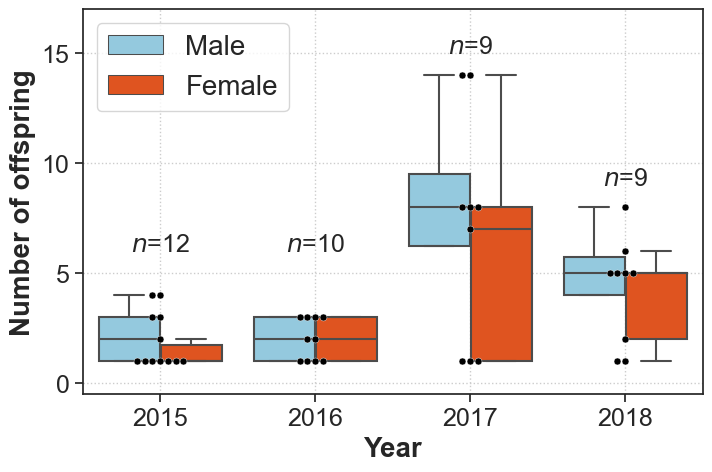

In [112]:
### Plot
sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(8,5))

palette={"Male": "skyblue","Female": 'orangered'}

sns.boxplot(data=rs_year, x='year', y='RS', hue='sex', palette=palette, sym="")
sns.swarmplot(data=rs_year, x="year", y="RS", color='black', edgecolor='white', linewidth=0.3)

# テキストを挿入
plt.text(0, 6, "$\it{n}$="+str(len(rs_year[rs_year['year'] == 2015])), ha="center", fontsize=18)
plt.text(1, 6, "$\it{n}$="+str(len(rs_year[rs_year['year'] == 2016])), ha="center", fontsize=18)
plt.text(2, 15, "$\it{n}$="+str(len(rs_year[rs_year['year'] == 2017])), ha="center", fontsize=18)
plt.text(3, 9, "$\it{n}$="+str(len(rs_year[rs_year['year'] == 2017])), ha="center", fontsize=18)

plt.xlabel('Year', fontsize=20, fontweight="bold")
plt.ylabel("Number of offspring", fontsize=20, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(range(0,20,5),fontsize=18)
plt.ylim([-0.5,17])
plt.legend(fontsize=20,loc='upper left')
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')
plt.savefig("Fig4b_reproductive_success_breeding_years.png",dpi=300, bbox_inches='tight')

### Variation of RS

In [113]:
rs_year['a'] = 'a'

tmp = pd.pivot_table(rs_year, index='year', columns='a', values='RS', aggfunc=[np.mean,np.std,np.min, np.max]).round(2)
tmp

,mean,std,amin,amax
a,a,a,a,a
year,,,,
2015,1.92,1.24,1,4
2016,2.00,0.94,1,3
2017,6.89,5.11,1,14
2018,4.22,2.39,1,8


## Lifetime reprosuctive success for 2016 cohort (Fig.4 c)

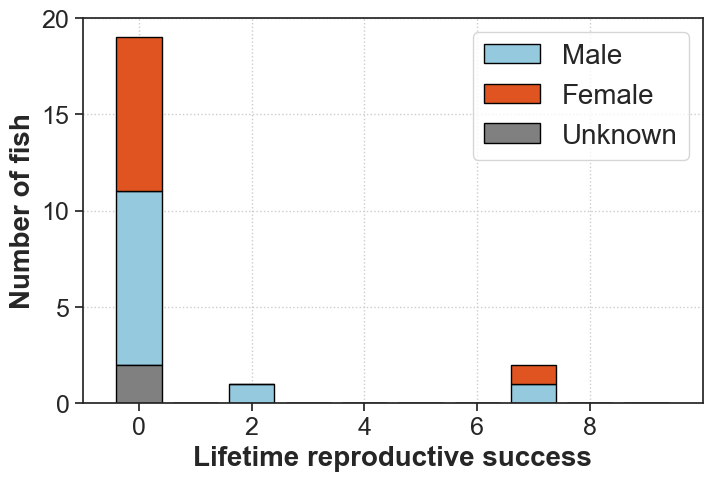

In [114]:
# 2016 cohort
rs2016c = rs.reset_index()
# rename
rs2016c = rs2016c.rename(columns={"index":"id"})
# マージ
rs2016c = pd.merge(ped, rs2016c, how="left", on = "id")

# replace Sex?
rs2016c = rs2016c.replace('female?', 'Female')
rs2016c = rs2016c.replace('male?', 'Male')

#
rs2016c = rs2016c[rs2016c['Cohort'] == 2016]
# Fill na
rs2016c = rs2016c.fillna(0)
# Calc. LRS
rs2016c["LRS"] = rs2016c[2016]+rs2016c[2017]+rs2016c[2018]+rs2016c[2019]

# Sex
rs2016c_male = rs2016c[(rs2016c['sex_x'] == 'Male')]
rs2016c_female = rs2016c[(rs2016c['sex_x'] == 'Female')]
rs2016c_nd = rs2016c[(rs2016c['sex_x'] == 'nd')]

# number of bins
bins = np.linspace(0, 10, 11)

freq_male = rs2016c_male['LRS'].value_counts(bins=bins, sort=False)
freq_female = rs2016c_female['LRS'].value_counts(bins=bins, sort=False)
freq_nd = rs2016c_nd['LRS'].value_counts(bins=bins, sort=False)
class_value = (bins[:-1] + bins[1:]) / 2  # 階級値

dist = pd.DataFrame({
    "class_value": class_value,
    "freq_male": freq_male,
    "freq_female": freq_female,
    "freq_nd": freq_nd,})

# new col.
dist['class'] = range(0,10)

### Plot
sns.set(style="ticks", font='Arial')
fig = plt.figure(figsize=(8,5))

palette={"Male": "skyblue","Female": 'orangered'}

sns.barplot(x='class', y='freq_male', data=dist, label="Male", color='skyblue', bottom=dist['freq_nd'], linewidth=1, edgecolor="black")
sns.barplot(x='class', y='freq_female', data=dist, label="Female", color='orangered', bottom=dist['freq_nd']+dist['freq_male'], linewidth=1, edgecolor="black")
sns.barplot(x='class', y='freq_nd', data=dist, label="Unknown", color='gray', linewidth=1, edgecolor="black")

plt.xlabel('Lifetime reproductive success', fontsize=20, fontweight="bold")
plt.ylabel("Number of fish", fontsize=20, fontweight="bold")
plt.xticks(range(0,10,2),fontsize=18)
plt.yticks(range(0,25,5),fontsize=18)
plt.xlim([-1,10])
plt.legend(fontsize=20,loc='upper right')
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')
plt.savefig("Fig4c_lifetime_reproductive_success_2016cohort.png",dpi=300, bbox_inches='tight')

## Calc. LLR of empirical data (Figure S4)

In [115]:
# Make Data Frame
po2_all = pd.DataFrame(columns=['ID','FileID','PO','FS','HS','GP','FA','U'],index=[0])
fs2_all = pd.DataFrame(columns=['ID','FileID','PO','FS','HS','GP','FA','U'],index=[0])
hs2_all = pd.DataFrame(columns=['ID','FileID','PO','FS','HS','GP','FA','U'],index=[0])
gp2_all = pd.DataFrame(columns=['ID','FileID','PO','FS','HS','GP','FA','U'],index=[0])
fa2_all = pd.DataFrame(columns=['ID','FileID','PO','FS','HS','GP','FA','U'],index=[0])


po_name = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/emp_snps_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld_error_0.01_CalcPairLL_PO.csv"
fs_name = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/emp_snps_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld_error_0.01_CalcPairLL_FS.csv"
hs_name = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/emp_snps_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld_error_0.01_CalcPairLL_HS.csv"
gp_name = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/emp_snps_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld_error_0.01_CalcPairLL_GP.csv"
fa_name = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/emp_snps_mindp20_maxdp200_imiss50_maf5_cr100_hwe_ld_error_0.01_CalcPairLL_FA.csv"

# Road Data
po = pd.read_csv(po_name, index_col=0)
fs = pd.read_csv(fs_name, index_col=0)
hs = pd.read_csv(hs_name, index_col=0)
gp = pd.read_csv(gp_name, index_col=0)
fa = pd.read_csv(fa_name, index_col=0)
# Make ID Column 
po["ID"] = po['ID1'] + "-" + po['ID2']
fs["ID"] = fs['ID1'] + "-" + fs['ID2']
hs["ID"] = hs['ID1'] + "-" + hs['ID2']
gp["ID"] = gp['ID1'] + "-" + gp['ID2']
fa["ID"] = fa['ID1'] + "-" + fa['ID2']
## need col.
po2 = po[['ID','PO','FS','HS','GP','FA','U']]
fs2 = fs[['ID','PO','FS','HS','GP','FA','U']]
hs2 = hs[['ID','PO','FS','HS','GP','FA','U']]
gp2 = gp[['ID','PO','FS','HS','GP','FA','U']]
fa2 = fa[['ID','PO','FS','HS','GP','FA','U']]

    

# New data
# PO   
po2["po_u"] = po2["PO"] - po2["U"]
po2["po_fs"] = po2["PO"] - po2["FS"]
po2["po_hs"] = po2["PO"] - po2["HS"]
po2["po_gp"] = po2["PO"] - po2["GP"]
po2["po_fa"] = po2["PO"] - po2["FA"]

# FS
fs2["fs_u"] = fs2["FS"] - fs2["U"]
fs2["fs_po"] = fs2["FS"] - fs2["PO"]
fs2["fs_hs"] = fs2["FS"] - fs2["HS"]
fs2["fs_gp"] = fs2["FS"] - fs2["GP"]
fs2["fs_fa"] = fs2["FS"] - fs2["FA"]

# HS   
hs2["hs_u"] = hs2["HS"] - hs2["U"]
hs2["hs_fs"] = hs2["HS"] - hs2["FS"]
hs2["hs_po"] = hs2["HS"] - hs2["PO"]
hs2["hs_gp"] = hs2["HS"] - hs2["GP"]
hs2["hs_fa"] = hs2["HS"] - hs2["FA"]

# GP
gp2["gp_u"] = gp2["GP"] - gp2["U"]
gp2["gp_fs"] = gp2["GP"] - gp2["FS"]
gp2["gp_hs"] = gp2["GP"] - gp2["HS"]
gp2["gp_po"] = gp2["GP"] - gp2["PO"]
gp2["gp_fa"] = gp2["GP"] - gp2["FA"]

# FA   
fa2["fa_u"] = fa2["FA"] - fa2["U"]
fa2["fa_fs"] = fa2["FA"] - fa2["FS"]
fa2["fa_hs"] = fa2["FA"] - fa2["HS"]
fa2["fa_gp"] = fa2["FA"] - fa2["GP"]
fa2["fa_po"] = fa2["FA"] - fa2["PO"]

po3 = po2["po_u"].to_list()+po2["po_fs"].to_list()+po2["po_hs"].to_list()+po2["po_gp"].to_list()+po2["po_fa"].to_list()
fs3 = fs2["fs_u"].to_list()+fs2["fs_po"].to_list()+fs2["fs_hs"].to_list()+fs2["fs_gp"].to_list()+fs2["fs_fa"].to_list()
hs3 = hs2["hs_u"].to_list()+hs2["hs_fs"].to_list()+hs2["hs_po"].to_list()+hs2["hs_gp"].to_list()+hs2["hs_fa"].to_list()
gp3 = gp2["gp_u"].to_list()+gp2["gp_fs"].to_list()+gp2["gp_hs"].to_list()+gp2["gp_po"].to_list()+gp2["gp_fa"].to_list()
fa3 = fa2["fa_u"].to_list()+fa2["fa_fs"].to_list()+fa2["fa_hs"].to_list()+fa2["fa_gp"].to_list()+fa2["fa_po"].to_list()

po3 = pd.DataFrame(({'LLR': po3,'Rel': "PO"}))
fs3 = pd.DataFrame(({'LLR': fs3,'Rel': "FS"}))
hs3 = pd.DataFrame(({'LLR': hs3,'Rel': "HS"}))
gp3 = pd.DataFrame(({'LLR': gp3,'Rel': "GP"}))
fa3 = pd.DataFrame(({'LLR': fa3,'Rel': "FA"}))

# concat
tmp = pd.concat([po3,fs3,hs3,gp3,fa3], axis=0)

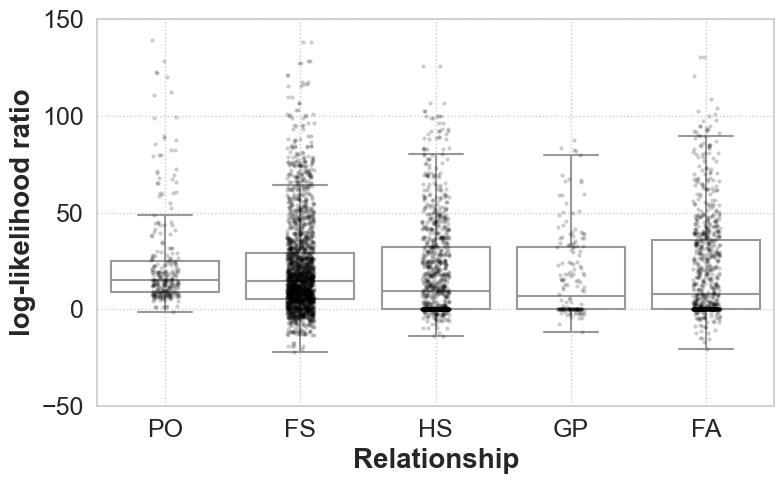

In [116]:
### Plot
sns.set(style="whitegrid", font='Arial')
fig = plt.figure(figsize=(8,5))

sns.boxplot(x='Rel', y='LLR', data=tmp, color="white", showfliers=False)
sns.stripplot(x='Rel', y='LLR', data=tmp, jitter=True, color='black', alpha=0.2, size=3)

plt.xlabel('Relationship', fontsize=20, fontweight="bold")
plt.ylabel('log-likelihood ratio', fontsize=20, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(range(-50,200,50), fontsize=18)
plt.grid(axis='x', linestyle='dotted')
plt.grid(axis='y', linestyle='dotted')

fig.tight_layout()
plt.savefig("FigS3_LLR.png",dpi=150, bbox_inches='tight')

## Number of relatives

In [117]:

list_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/filelist.csv"

lists = pd.read_csv(list_path)
#
lists = lists[lists['set'] == "all"]

# Make file list
filename = lists["filename"].to_list()
filtering = lists["filtering"].to_list()

# Make Data Frame
df_all = pd.DataFrame(columns=['PO','FS','HS'],index=[])

sequoia_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/output/"

i = 0
for lis in filename:
    in_name = sequoia_path + "emp_" + lis + "_error_0.01_PairL.csv"
    
    # Road Data
    df = pd.read_csv(in_name, index_col=0)
    
    po = df.loc["MP","MP"]
    fs = df.loc["FS","FS"]
    hs = df.loc["HS","HS"]
    
    # Make Data Frame
    tmp = pd.DataFrame(columns=['PO','FS','HS'],index=[filtering[i]],data=[[po,fs,hs]])
    
    df_all = pd.concat([df_all,tmp])
    
    i = i + 1
    
    
# to excel
df_all.to_excel("TableS3.xlsx")

## Check sample data

In [118]:
# input path
lh_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/LifeHistData.txt"

# Road data
lh = pd.read_csv(lh_path, sep="\t")

# Edit sex
lh = lh.replace(1, 'female')
lh = lh.replace(2, 'male')
lh = lh.replace(3, 'nd')

# Pivot
table = pd.pivot_table(lh, index='Sex', columns='BirthYear', values='id', aggfunc='count', margins=True)

# 性別不明個体　2個体（E3_417, E3_3379）
table

BirthYear,2015,2016,2017,2018,2019,All
Sex,,,,,,
female,1.0,9.0,5.0,9.0,6.0,30
male,2.0,11.0,5.0,20.0,12.0,50
nd,NaN,2.0,1.0,2.0,1.0,6
All,3.0,22.0,11.0,31.0,19.0,86


In [119]:
# potential parents
3+22+11+31

67

## Number of breeders in sampled fish

In [120]:
in_path = "/Users/nodashouhei/R/20240123_PE2023_Omi_GRASdi/"

# Road data
par = pd.read_csv(in_path+"Parents_used.txt", sep = ' +')

genotyped_parent = [len(par['dam'].unique())-1,len(par['sire'].unique())-1]
genotyped_parent

[3, 4]

## Number of offspring assigned to sampled fish

In [121]:
numoff = [len(par["dam"].dropna()),len(par["sire"].dropna())]
numoff

[20, 35]

## Number of offspring assigned to the sampled parents

In [133]:
# Marge 
ped2 = pd.merge(par, lh, how="left", on = "id")
# need col.
ped2 = ped2[['id','dam','sire','BirthYear','Sex']]

# new parent cohort col.
# rename col. name
lh_dam = lh.rename(columns={"id":"dam","BirthYear":"dam_Cohort","Sex":"dam_Sex"})
lh_sire = lh.rename(columns={"id":"sire","BirthYear":"sire_Cohort","Sex":"sire_Sex"})

# Marge 
ped2 = pd.merge(ped2, lh_dam, how="left", on = "dam")
ped2 = pd.merge(ped2, lh_sire, how="left", on = "sire")

# Make Data Frame
df_all = pd.DataFrame(columns=[],index=['dam','sire','both'])

lists = [2016,2017,2018,2019]

for lis in lists:
    # cohort
    tmp = ped2[ped2['BirthYear'] == lis]
    # calc.
    # dam
    dam = (tmp['dam_Cohort'][(tmp['dam_Cohort'] == 2016)].count()+
           tmp['dam_Cohort'][(tmp['dam_Cohort'] == 2017)].count()+
           tmp['dam_Cohort'][(tmp['dam_Cohort'] == 2018)].count())/tmp['id'].count()
    
    sire = (tmp['sire_Cohort'][(tmp['sire_Cohort'] == 2016)].count()+
           tmp['sire_Cohort'][(tmp['sire_Cohort'] == 2017)].count()+
           tmp['sire_Cohort'][(tmp['sire_Cohort'] == 2018)].count())/tmp['id'].count()

    sub = [dam.round(3), sire.round(3), ((dam+sire)/2).round(3)]
    # concat
    df_all[str(lis)] = sub
    
df_all['sum'] = df_all.sum(axis=1)/3

In [134]:
par.to_csv("test.csv")

## kinship input data

In [135]:
ped

,id,dam,sire,sex,Cohort
0,E3_109,nd,nd,Female,2016.0
1,E3_1353,F0007,M0005,Female,2016.0
2,E3_1354,nd,M0004,Male,2016.0
3,E3_1361,nd,M0003,Male,2015.0
4,E3_1365,F0005,M0003,nd,2016.0
...,...,...,...,...,...
98,M0003,nd,nd,nd,nd
99,M0004,nd,nd,nd,nd
100,M0005,nd,nd,nd,nd
101,M0006,nd,nd,nd,nd


In [136]:
ped2["Sex"].unique()

array(['female', 'male', 'nd'], dtype=object)

In [159]:
# replace
ped2 = ped.replace('Female', 'female')
ped2 = ped2.replace('Male', 'male')

ped2 = ped2.replace("nd","NA")

# split data E3 & Dummy 
e3 = ped2[ped2['id'].str.startswith('E3')]
dam = ped2[ped2['id'].str.startswith('F')]
sire = ped2[ped2['id'].str.startswith('M')]

dam['sex'] = 'female'
sire['sex'] = 'male'

# concat
ped2 = pd.concat([e3, dam, sire], axis=0)

## SEX
# replace
ped2["sex"] = ped2["sex"].replace(1, 'female')
ped2["sex"] = ped2["sex"].replace(2, 'male')
ped2["sex"] = ped2["sex"].replace('NA', 3)

# new sex col.
ped2["sex2"] = ped2["sex"]
ped2["sex_col"] = ped2["sex"]
# replace
ped2["sex2"] = ped2["sex2"].replace('male',1)
ped2["sex2"] = ped2["sex2"].replace('female',2)
ped2["sex2"] = ped2["sex2"].replace('male?',3)
ped2["sex2"] = ped2["sex2"].replace('female?',3)
# replace
ped2["sex_col"] = ped2["sex_col"].replace('male',"skyblue")
ped2["sex_col"] = ped2["sex_col"].replace('female',"orangered")

# new col.
ped2["aff"] = 1

# Split data  'NA' and 'not NA'
ped3 = ped2[(ped2['dam'] != 'NA')&(ped2['sire'] != 'NA')]
ped3_na = ped2[(ped2['dam'] == 'NA')&(ped2['sire'] == 'NA')]
ped3_na2 = ped2[(ped2['dam'] != 'NA')&(ped2['sire'] == 'NA')]
ped3_na3 = ped2[(ped2['dam'] == 'NA')&(ped2['sire'] != 'NA')]

# 片親しか見つかっていない個体の親をNAにかえる
ped3_na2['no'] = range(1,len(ped3_na2)+1)
ped3_na3['no'] = range(1,len(ped3_na3)+1)

ped3_na2['sire'] = 'S' + ped3_na2['no'].astype(str)
ped3_na3['dam'] = 'D' + ped3_na3['no'].astype(str)

# New data
dummy_sire = pd.DataFrame({'id': ped3_na2['sire'],
                           'dam': 'NA',
                           'sire': 'NA',
                           'sex': 'male',
                           'Cohort': 'NA',
                           'sex2': 1,
                           'aff': 'NA',
                           'no': 'NA'})
dummy_dam = pd.DataFrame({'id': ped3_na3['dam'],
                           'dam': 'NA',
                           'sire': 'NA',
                           'sex': 'female',
                           'Cohort': 'NA',
                           'sex2': 2,
                           'aff': 'NA',
                           'no': 'NA'})

# concat
ped4 = pd.concat([ped3,ped3_na,ped3_na2,ped3_na3,dummy_sire,dummy_dam])

### V2

In [160]:

# Color
red = ["indianred3","indianred3","indianred3","indianred3"]
yellow = ["goldenrod2","goldenrod2","goldenrod2","goldenrod2"]

# Founder 1
founder = 'M0004'

ped4.loc[ped4["id"]==founder,'color'] = red[0]

ped4.loc[ped4["dam"]==founder,'color'] = red[1]
ped4.loc[ped4["sire"]==founder,'color'] = red[1]
# Offspring List
lists = ped4['id'][(ped4['dam'] == founder)|(ped4['sire'] == founder)].tolist()

for lis in lists:
    ped4.loc[ped4["dam"]==lis,'color'] = red[2]
    ped4.loc[ped4["sire"]==lis,'color'] = red[2]

    lists2 = ped4['id'][(ped4['dam'] == lis)|(ped4['sire'] == lis)].tolist()

    for lis2 in lists2:
        ped4.loc[ped4["dam"]==lis2,'color'] = red[3]
        ped4.loc[ped4["sire"]==lis2,'color'] = red[3]

        lists3 = ped4['id'][(ped4['dam'] == lis2)|(ped4['sire'] == lis2)].tolist()

contribution1 = [(ped4['color']==red[0]).sum(),
                 (ped4['color']==red[1]).sum(),
                 (ped4['color']==red[2]).sum(),
                 (ped4['color']==red[3]).sum()]


# Founder 2
founder = 'F0007'

ped4.loc[ped4["id"]==founder,'color'] = yellow[0]

ped4.loc[ped4["dam"]==founder,'color'] = yellow[1]
ped4.loc[ped4["sire"]==founder,'color'] = yellow[1]
# Offspring List
lists = ped4['id'][(ped4['dam'] == founder)|(ped4['sire'] == founder)].tolist()

for lis in lists:
    ped4.loc[ped4["dam"]==lis,'color'] = yellow[2]
    ped4.loc[ped4["sire"]==lis,'color'] = yellow[2]

    lists2 = ped4['id'][(ped4['dam'] == lis)|(ped4['sire'] == lis)].tolist()

    for lis2 in lists2:
        ped4.loc[ped4["dam"]==lis2,'color'] = yellow[3]
        ped4.loc[ped4["sire"]==lis2,'color'] = yellow[3]

        lists3 = ped4['id'][(ped4['dam'] == lis2)|(ped4['sire'] == lis2)].tolist()

        for lis3 in lists3:
            ped4.loc[ped4["dam"]==lis3,'color'] = yellow[3]
            ped4.loc[ped4["sire"]==lis3,'color'] = yellow[3]

            lists4 = ped4['id'][(ped4['dam'] == lis3)|(ped4['sire'] == lis3)].tolist()

contribution3 = [(ped4['color']==yellow[0]).sum(),
                 (ped4['color']==yellow[1]).sum(),
                 (ped4['color']==yellow[2]).sum(),
                 (ped4['color']==yellow[3]).sum()]

# fill na
ped4['color'] = ped4['color'].fillna('black')

# txt out
ped4.to_csv("kinship_input.txt",index=None)

### V1

In [157]:

# Color
#red = ["firebrick","tomato","coral","sandybrown"]
#blue = ["blue3","dodgerblue","deepskyblue","lightskyblue"]
#green = ["seagreen","forestgreen","mediumseagreen","lightgreen"]

red = ["indianred3","indianred3","indianred3","indianred3"]
blue = ["dodgerblue4","dodgerblue4","dodgerblue4","dodgerblue4"]
yellow = ["goldenrod2","goldenrod2","goldenrod2","goldenrod2"]

# Founder 1
founder = 'M0004'

ped4.loc[ped4["id"]==founder,'color'] = red[0]

ped4.loc[ped4["dam"]==founder,'color'] = red[1]
ped4.loc[ped4["sire"]==founder,'color'] = red[1]
# Offspring List
lists = ped4['id'][(ped4['dam'] == founder)|(ped4['sire'] == founder)].tolist()

for lis in lists:
    ped4.loc[ped4["dam"]==lis,'color'] = red[2]
    ped4.loc[ped4["sire"]==lis,'color'] = red[2]

    lists2 = ped4['id'][(ped4['dam'] == lis)|(ped4['sire'] == lis)].tolist()

    for lis2 in lists2:
        ped4.loc[ped4["dam"]==lis2,'color'] = red[3]
        ped4.loc[ped4["sire"]==lis2,'color'] = red[3]

        lists3 = ped4['id'][(ped4['dam'] == lis2)|(ped4['sire'] == lis2)].tolist()

contribution1 = [(ped4['color']==red[0]).sum(),
                 (ped4['color']==red[1]).sum(),
                 (ped4['color']==red[2]).sum(),
                 (ped4['color']==red[3]).sum()]

# Founder 2
founder = 'F0007'

ped4.loc[ped4["id"]==founder,'color'] = blue[0]

ped4.loc[ped4["dam"]==founder,'color'] = blue[1]
ped4.loc[ped4["sire"]==founder,'color'] = blue[1]
# Offspring List
lists = ped4['id'][(ped4['dam'] == founder)|(ped4['sire'] == founder)].tolist()

for lis in lists:
    ped4.loc[ped4["dam"]==lis,'color'] = blue[2]
    ped4.loc[ped4["sire"]==lis,'color'] = blue[2]

    lists2 = ped4['id'][(ped4['dam'] == lis)|(ped4['sire'] == lis)].tolist()

    for lis2 in lists2:
        ped4.loc[ped4["dam"]==lis2,'color'] = blue[3]
        ped4.loc[ped4["sire"]==lis2,'color'] = blue[3]

        lists3 = ped4['id'][(ped4['dam'] == lis2)|(ped4['sire'] == lis2)].tolist()

        for lis3 in lists3:
            ped4.loc[ped4["dam"]==lis3,'color'] = blue[3]
            ped4.loc[ped4["sire"]==lis3,'color'] = blue[3]

            lists4 = ped4['id'][(ped4['dam'] == lis3)|(ped4['sire'] == lis3)].tolist()

contribution2 = [(ped4['color']==blue[0]).sum(),
                 (ped4['color']==blue[1]).sum(),
                 (ped4['color']==blue[2]).sum(),
                 (ped4['color']==blue[3]).sum()]

# Founder 3
founder = 'F0005'

ped4.loc[ped4["id"]==founder,'color'] = yellow[0]

ped4.loc[ped4["dam"]==founder,'color'] = yellow[1]
ped4.loc[ped4["sire"]==founder,'color'] = yellow[1]
# Offspring List
lists = ped4['id'][(ped4['dam'] == founder)|(ped4['sire'] == founder)].tolist()

for lis in lists:
    ped4.loc[ped4["dam"]==lis,'color'] = yellow[2]
    ped4.loc[ped4["sire"]==lis,'color'] = yellow[2]

    lists2 = ped4['id'][(ped4['dam'] == lis)|(ped4['sire'] == lis)].tolist()

    for lis2 in lists2:
        ped4.loc[ped4["dam"]==lis2,'color'] = yellow[3]
        ped4.loc[ped4["sire"]==lis2,'color'] = yellow[3]

        lists3 = ped4['id'][(ped4['dam'] == lis2)|(ped4['sire'] == lis2)].tolist()

        for lis3 in lists3:
            ped4.loc[ped4["dam"]==lis3,'color'] = yellow[3]
            ped4.loc[ped4["sire"]==lis3,'color'] = yellow[3]

            lists4 = ped4['id'][(ped4['dam'] == lis3)|(ped4['sire'] == lis3)].tolist()

contribution3 = [(ped4['color']==yellow[0]).sum(),
                 (ped4['color']==yellow[1]).sum(),
                 (ped4['color']==yellow[2]).sum(),
                 (ped4['color']==yellow[3]).sum()]

# fill na
ped4['color'] = ped4['color'].fillna('black')

# txt out
ped4.to_csv("kinship_input.txt",index=None)